# Проект: Российский кинопрокат и влияние государственной поддержки

## Введение

Данное исследование выполнено по заказу Министерства культуры Российской Федерации и направлено на исследование рынка российского кинопроката. Основной акцент сделан на анализ фильмов, которые получили государственную поддержку. В условиях развития отечественной киноиндустрии, особенно важным является понимание того, насколько такие фильмы интересны зрителю и насколько они оправдывают вложенные средства. В рамках исследования будут изучены текущие тренды на рынке кинопроката, включая анализ сборов, популярности различных жанров, а также влияние возрастных ограничений на финансовый успех фильмов.

## Цель исследования

Выявление влияния государственной поддержки на востребованность и кассовые сборы российских фильмов на рынке кинопроката. 

## Описание данных

Исследование проводится на основе данных, опубликованных на портале открытых данных Министерства культуры РФ. В проекте используются два основных набора данных:
1. Таблица **mkrf_movies** — содержит информацию из реестра прокатных удостоверений:
    * title: название фильма;
    * puNumber: номер прокатного удостоверения;
    * show_start_date: дата премьеры фильма;
    * type: тип фильма;
    * film_studio: студия-производитель;
    * production_country: страна-производитель;
    * director: режиссёр;
    * producer: продюсер;
    * age_restriction: возрастная категория;
    * refundable_support: объём возвратных средств государственной поддержки;
    * nonrefundable_support: объём невозвратных средств государственной поддержки;
    * financing_source: источник государственного финансирования;
    * budget: общий бюджет фильма, включая государственную поддержку;
    * ratings: рейтинг фильма на сайте КиноПоиск;
    * genres: жанр фильма.<br><br>
2. Таблица **mkrf_shows** — содержит данные о показах фильмов в российских кинотеатрах:
    * puNumber: номер прокатного удостоверения;
    * box_office: сборы в рублях.

Данные, используемые в исследовании, позволяют провести глубокий анализ текущего состояния рынка и выявить значимые закономерности, которые могут быть полезны для дальнейшего развития отрасли.

## План исследования

1. [Загрузка данных](#link1)
* Загрузка данных из двух источников.
* Объединение данных в единый датафрейм по номеру прокатного удостоверения.

2. [Предобработка данных](#link2)
* Проверка и преобразование типов данных.
* Обработка пропусков и дубликатов.
* Корректировка категориальных переменных.
* Создание новых столбцов (год проката, имя режиссёра, жанр, доля господдержки).

3. [Исследовательский анализ данных](#link3)
* Анализ количества фильмов и динамики кассовых сборов по годам.
* Оценка влияния возрастных ограничений на сборы.

4. [Анализ фильмов с государственной поддержкой](#link4)
* Оценка объёма господдержки, окупаемости и популярности поддержанных фильмов.
* Выявление интересных закономерностей.

5. [Общий вывод](#link5)

## Подготовка рабочего пространства

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None) # для отображения всех столбцов

<a class='anchor' id="link1"></a>
## 1 Загрузка данных 

Объединим данные таким образом, чтобы все объекты из датасета `mkrf_moviesо вошли в получившийся датафрейм. 

In [2]:
try:
    mkrf_movies = pd.read_csv('mkrf_movies.csv')
except:
    mkrf_movies = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_movies.csv')

In [3]:
try:
    mkrf_shows = pd.read_csv('mkrf_shows.csv')
except:
    mkrf_shows = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_shows.csv')

**Изучим общую информацию о датафреймах**

In [4]:
mkrf_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


Важно заметить, что у одного фильма может быть несколько прокатных удостоверений.

In [5]:
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Таблица состоит из 15 столбцов и 7486 строк. В таблице имеются пропуски. Столбец puNumber имеет стилистически неправильное название. Столбцы puNumber и ratings требуют преобразования типов данных.

In [6]:
mkrf_shows.head()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


In [7]:
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Таблица состоит из 2 столбцов и 3158 строк. Пропусков нет. Типы данных соответствуют значениям столбцов. Столбец puNumber имеет стилистически неправильное название.

**Переименование столбцов puNumber**

Переименуем столбцы puNumber в pu_number

In [8]:
mkrf_movies.rename(columns={'puNumber': 'pu_number'}, inplace=True)
mkrf_shows.rename(columns={'puNumber': 'pu_number'}, inplace=True)

In [9]:
mkrf_movies.sample()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
578,Секса много не бывает,121017416,2016-06-07T12:00:00.000Z,Художественный,"Канал+, Франс Телевизьон, Гомон, Скоп Пикчерз",Франция-Бельгия,Реми Безансон,NaN,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"драма,комедия"


In [10]:
mkrf_shows.sample()

,pu_number,box_office
824,114000817,206478186.0


Переименование прошло успешно.

**Объединим датафреймы**

Объединять датафреймы будем по столбцу pu_number. Для этого типы данных в этих столбцах должны быть одинаковыми для обоих таблиц.

В таблице mkrf_movies столбец pu_number имеет тип данных object, при том, что его номера прокатных удостоверений являются целыми числами. Переведем столбец в целочисленный тип данных.

Проверим, все ли значения в столбце являются числовыми.

In [11]:
is_numeric = pd.to_numeric(mkrf_movies['pu_number'], errors='coerce').notnull()
is_numeric.value_counts()

pu_number
True     7485
False       1
Name: count, dtype: int64

In [12]:
mkrf_movies.loc[is_numeric[is_numeric == False].index]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


В таблице имеется строка с нечисловым значением в столбце pu_number. Заменим 'нет' на NaN, чтобы можно было преобразовать тип данных в Int64.

In [13]:
mkrf_movies['pu_number'] = mkrf_movies['pu_number'].replace('нет', np.nan)

In [14]:
mkrf_movies.loc[is_numeric[is_numeric == False].index]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),NaN,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


Переведем типы данных в столбцах pu_number в Int64.

In [15]:
mkrf_movies['pu_number'] = mkrf_movies['pu_number'].astype('Int64')
mkrf_shows['pu_number'] = mkrf_movies['pu_number'].astype('Int64')

In [16]:
print(mkrf_movies['pu_number'].dtype, mkrf_shows['pu_number'].dtype)

Int64 Int64


Теперь типы данных в двух датафреймах совпадают.

Объединим данные в одну таблицу.

In [17]:
data = pd.merge(mkrf_movies, mkrf_shows, on='pu_number', how='left')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   pu_number              7485 non-null   Int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

**Промежуточный итог:**

Все строки из датасета mkrf_movies вошли в новый датафрейм **data**. Объединение данных прошло успешно.

<a class='anchor' id="link2"></a>
## 2 Предобработка данных

**2.1 Приведение типов данных**

**Преобразование типа данных в столбце ratings**

Рейтинг фильмов представлен вещественными числами, поэтому для столбца ratings поменяем тип данных на float.
При изменении типа данных появляется ошибка. Посмотрим на значения столбца внимательнее.

In [19]:
is_numeric_2 = pd.to_numeric(data['ratings'], errors='coerce').notnull()
is_numeric_2.value_counts()

ratings
True     6490
False     996
Name: count, dtype: int64

In [20]:
data['ratings'].value_counts().sort_index(ascending=False).head(10)

ratings
99%    4
98%    2
97%    3
94%    3
91%    3
90%    1
9.2    1
9.1    1
9.0    2
89%    1
Name: count, dtype: int64

Часть значений рейтинга представленна виде процентов.

Переведем проценты в стандартный рейтинг от 0.0 до 10.0.

In [21]:
def convert_rating(rating):
    if isinstance(rating, str) and '%' in rating:
        return float(rating.replace('%', '')) / 10
    else:
        return float(rating)

data['ratings'] = data['ratings'].apply(convert_rating)

In [22]:
data['ratings'].value_counts().sort_index(ascending=False)

ratings
9.9    4
9.8    2
9.7    3
9.4    3
9.2    1
      ..
1.4    2
1.3    1
1.2    1
1.1    2
1.0    1
Name: count, Length: 84, dtype: int64

Теперь рейтинг фильмов лежит в диапазоне от 0.0 до 10.0.

Поменяем тип данных на float.

In [23]:
data['ratings'] = data['ratings'].astype('float')

In [24]:
data['ratings'].dtype

dtype('float64')

**Промежуточный итог:**

Преобразование типа данных прошло успешно.

**2.2 Обработка пропусков**

Взглянем подробнее на наличие пропусков в таблице.

In [25]:
na_sum = data.isna().sum()
na_mean = data.isna().mean()*100

na_agg = pd.DataFrame({
    'Количество пропусков' : na_sum,
    'Процент пропусков' : na_mean.round(1)
})

na_agg.sort_values(by='Количество пропусков', ascending=False)

,Количество пропусков,Процент пропусков
financing_source,7154,95.6
budget,7154,95.6
nonrefundable_support,7154,95.6
refundable_support,7154,95.6
box_office,4328,57.8
genres,976,13.0
ratings,967,12.9
producer,568,7.6
film_studio,18,0.2
director,9,0.1


**Обработка пропусков в столбцах pu_number, film_studio, production_country, director**

Изучим информацию о фильмах в пропусками в столбцах pu_number, film_studio, production_country, director.

In [26]:
data_with_na = data[data[['pu_number', 'film_studio', 'production_country', 'director']].isna().any(axis=1)]
data_with_na

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04T12:00:00.000Z,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,9.228480e+05
1293,Stars in Shorts,121011114,2014-06-03T12:00:00.000Z,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.3,комедия,2.106492e+07
1735,Помпеи. Британский музей,126003413,2013-09-11T12:00:00.000Z,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,1.925476e+06
1797,Курбан-роман. (История с жертвой),<NA>,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,6.753910e+08
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09T12:00:00.000Z,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",NaN
3840,Зур концерт (Большой концерт).,217027010,2010-06-24T12:00:00.000Z,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4052,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22T12:00:00.000Z,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4298,Изге Вэли (Святой Валентин),217020610,2010-05-20T12:00:00.000Z,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4415,Bon Jovi. The Circle Tour,126001710,2010-11-11T12:00:00.000Z,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.9,"концерт,музыка",NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25T12:00:00.000Z,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


In [27]:
data_with_na['title'].count()

np.int64(28)

In [28]:
data_with_na.isna().sum()

title                     0
pu_number                 1
show_start_date           0
type                      0
film_studio              18
production_country        2
director                  9
producer                  4
age_restriction           0
refundable_support       28
nonrefundable_support    28
budget                   28
financing_source         28
ratings                  20
genres                   20
box_office               24
dtype: int64

Фильмы с пропусками в столбцах pu_number, film_studio, production_country, director также имеют незаполненными столбцы refundable_support, nonrefundable_support, budget, financing_source, которые нужны для основной цели анализа.

Предлагается эти строки удалить.

In [29]:
data = data[data[['pu_number', 'film_studio', 'production_country', 'director']].isna().any(axis=1) == False]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7458 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7458 non-null   object 
 1   pu_number              7458 non-null   Int64  
 2   show_start_date        7458 non-null   object 
 3   type                   7458 non-null   object 
 4   film_studio            7458 non-null   object 
 5   production_country     7458 non-null   object 
 6   director               7458 non-null   object 
 7   producer               6894 non-null   object 
 8   age_restriction        7458 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6511 non-null   float64
 14  genres                 6502 non-null   object 
 15  box_offic

**Обработка пропусков в столбце producer**

In [30]:
data[data['producer'].isna() == True].value_counts('production_country')

production_country
СССР                                                        342
Россия                                                       34
Великобритания                                               33
США                                                          24
СССР                                                         20
                                                           ... 
США - Великобритания - Италия - Израиль - Сербия - Индия      1
Франция-Австралия                                             1
Франция - Россия                                              1
Франция-Грузия-Германия-Россия-Украина-Бельгия                1
Чехословакия                                                  1
Name: count, Length: 70, dtype: int64

Наличие пропусков в данном столбце можно связать с тем, что в СССР отсутствовала должность продюссера фильма. Можно предположить, что пропуски в столбце  producer в других стоках появились также по причине отсутствия человека на данной должности. Пропуск в данном случае несет в себе информацию, поэтому оставим их без изменения.

**Обработка пропусков в столбцах refundable_support, nonrefundable_support, budget, financing_source**

In [31]:
data[data['financing_source'].isna() == False]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1281,Пока еще жива,111005313,2013-10-11T12:00:00.000Z,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма,мелодрама",165890.0
1448,Бесславные придурки,111003314,2014-03-28T12:00:00.000Z,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,NaN,NaN,4280693.5
1498,Невидимки,111004213,2013-09-10T12:00:00.000Z,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",4321194.6
1524,БЕРЦЫ,111004314,2014-05-05T12:00:00.000Z,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,1869220.0
1792,Братья Ч,111004414,2014-04-23T12:00:00.000Z,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,30778027.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26T12:00:00.000Z,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.0,400000000.0,980000000.0,Фонд кино,6.0,"история,биография,драма",NaN
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20T12:00:00.000Z,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.0,0.0,190000000.0,Фонд кино,6.7,"мультфильм,приключения,семейный",NaN
7474,Вторжение,111022519,2019-12-23T12:00:00.000Z,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,400000000.0,944000000.0,Фонд кино,5.7,"фантастика,боевик",NaN
7476,Я свободен,111023019,2019-12-26T12:00:00.000Z,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,30000000.0,46154000.0,Министерство культуры,5.9,драма,NaN


Наличие пропусков в данных столбцах можно объяснить тем, что Министерство культуры Российской Федерации регистрирует информацию о финансировании только тех фильмов, в которых есть государственная поддержка. Оставим пропуски без изменения.

**Обработка пропусков в столбцах ratings, genres**

In [32]:
data[['ratings', 'genres']].isna().mean()*100

ratings    12.697774
genres     12.818450
dtype: float64

Количество строк с пропусками в данных столбцах больше 12%. Удаление или заполнение пропусков в других столбцах может повлиять на точность анализа. Оставим пропуски без изменения, но при дальнейшем анализе будем иметь ввиду их наличие.

**Промежуточный итог:**

Пропуски в датафрейме изучены. Часть пропусков удалена. Пропуски, наличие которых несет в себе информацию, были оставлены без изменения. Пропуски, удаление которых повлияет на точнось исследования, также были оставлены.

**2.3 Поиск дубликатов**

**Поищем явные дубликаты**

In [33]:
data.duplicated().sum()

np.int64(0)

Полностю повторяющихся строк нет.

**Проверка неявных дубликатов**

Поищем неявные дубликаты по номеру прокатного удостоверения

In [34]:
data[data['pu_number'].duplicated(keep=False)].sort_values(by='title')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5068,Анализируй то!,221054410,2010-05-25T12:00:00.000Z,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN
5067,Анализируй это!,221054410,2010-05-25T12:00:00.000Z,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17T12:00:00.000Z,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
4638,Как жениться и остаться холостым,221154310,2010-12-17T12:00:00.000Z,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN


Фильмы 'Анализируй то!' и 'Анализируй это!' имеют одинаковое прокатное удостоверение.
Такая же ситуация с фильмами 'Иоанна - женщина на папском престоле' и 'Как жениться и остаться холостым'.
Вероятно ошибка в данных. Для этих фильмов также отсутствует информация о бюджете, финансировании и сборах. Удалять эти фильмы не будем. Одинаковые номера прокатных удостоверений на результаты исследования не повлияют.

Поищем неявные дубликаты по названию фильма

In [35]:
data[data['title'].duplicated(keep=False)].sort_values(by='title')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
454,100 миллионов евро,221024616,2016-05-25T12:00:00.000Z,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.1,комедия,67418974.80
455,100 миллионов евро,121013712,2012-06-06T12:00:00.000Z,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.1,комедия,368738.00
5058,127 часов,221069011,2011-05-18T12:00:00.000Z,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"триллер,биография,драма",NaN
4852,127 часов,121000811,2011-01-27T12:00:00.000Z,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"триллер,биография,драма",NaN
3129,13 часов: Тайные солдаты Бенгази,221019616,2016-04-19T12:00:00.000Z,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.7,"боевик,триллер,драма",250.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1811,Этим утром в Нью-Йорке,221033214,2014-08-20T12:00:00.000Z,Художественный,"Лэндскейп Интертейнмент, Форс Мажор, Проминент...",США,Фил Олден Робинсон,"Боб Купер, Тайлер Митчелл, Дэниэл Дж. Уолкер",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.2,"драма,комедия",99530233.94
4071,Я ненавижу день святого Валентина,121002010,2010-02-04T12:00:00.000Z,Художественный,"Блю Стар Пикчерз, Ай Хэйт Вдэй Продакшнз, Ай С...",США,Ниа Вардалос,"Доминик Йанно, Мэдлейн Шерак, Уильям Шерак",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.0,"мелодрама,комедия",NaN
4505,Я ненавижу день святого Валентина,221139210,2010-12-03T12:00:00.000Z,Художественный,"Блю Стар Пикчерз, Ай Хэйт Вдэй Продакшнз, Ай С...",США,Ниа Вардалос,"Доминик Йанно, Мэдлейн Шерак, Уильям Шерак",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.0,"мелодрама,комедия",NaN
1703,"Я, снова я и мама",121013116,2016-05-23T12:00:00.000Z,Художественный,"Гомон, Эль Джи Эм Продакшнз, Ректанль Продюксь...",Франция - Бельгия,Гийом Гальенн,"Жан-Батист Дюпон, Алис Жирар, Сирил Кольбо-Жюстен",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.3,"комедия,мелодрама,драма",48325099.40


Посмотрим для скольких фильмов среди дубликатов указана информация о гос. финансировании

In [36]:
data[data['title'].duplicated(keep=False) & (data['financing_source'].isna() == False)].sort_values(by='title')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7474,Вторжение,111022519,2019-12-23T12:00:00.000Z,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,400000000.0,944000000.0,Фонд кино,5.7,"фантастика,боевик",NaN
6898,Мысленный волк,111007419,2019-06-09T12:00:00.000Z,Художественный,"ООО ""САГА""",Россия,Валерия Гай Германика,"А.Савельев, А.Васильев, Валерия Гай Германика",«16+» - для детей старше 16 лет,0.0,30000000.0,48000000.0,Министерство культуры,5.3,"фэнтези,драма,фильм-нуар",NaN
5829,Прощаться не будем,111003418,2018-06-21T12:00:00.000Z,Художественный,"ООО ""РФГ Корп"", ООО ""Студия ""МОСТ""",Россия,П.Дроздов,А.Петрухин,«6+» - для детей старше 6 лет,0.0,35000000.0,109814241.0,Министерство культуры,5.8,"военный,драма,история",NaN
3614,Три сестры,111004417,2017-06-09T12:00:00.000Z,Художественный,"ООО ""РТВ"", АО ""ТПО ""Киностудия им. М.Горького""...",Россия,Ю.Грымов,"Ю.Грымов, С.Зернов",«16+» - для детей старше 16 лет,0.0,25000000.0,37878787.0,Министерство культуры,NaN,NaN,NaN
7322,Успех,111018519,2019-11-04T12:00:00.000Z,Художественный,"ООО ""Кинодом""",Россия,П.Руминов,"С.Бобза, Г.Малков, В.Поляков, М.Кучмент",«12+» - для детей старше 12 лет,5000000.0,20000000.0,75000000.0,Фонд кино,7.8,драма,NaN


Среди дубликатов встречается 5 фильмов с гос. поддержкой. 
    
Посмотрим внимательнее на фильмы с такими названиями.

In [37]:
titles = [
    'Вторжение',
    'Мысленный волк',
    'Прощаться не будем',
    'Прощаться не будем	',
    'Три сестры',
    'Успех'
]
data[data['title'].isin(titles)].sort_values(by='title')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5430,Вторжение,124002417,2017-08-01T12:00:00.000Z,Анимационный,Баобаб Студиос,США,Эрик Дарнелл,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,5.7,"фантастика,боевик",NaN
7474,Вторжение,111022519,2019-12-23T12:00:00.000Z,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,400000000.0,944000000.0,Фонд кино,5.7,"фантастика,боевик",NaN
6488,Мысленный волк,111023718,2019-06-01T12:00:00.000Z,Художественный,"ООО САГа""",Россия,Валерия Гай Германика,"Андрей Савельев, Артем Васильев",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.3,"фэнтези,драма,фильм-нуар",NaN
6898,Мысленный волк,111007419,2019-06-09T12:00:00.000Z,Художественный,"ООО ""САГА""",Россия,Валерия Гай Германика,"А.Савельев, А.Васильев, Валерия Гай Германика",«16+» - для детей старше 16 лет,0.0,30000000.0,48000000.0,Министерство культуры,5.3,"фэнтези,драма,фильм-нуар",NaN
5829,Прощаться не будем,111003418,2018-06-21T12:00:00.000Z,Художественный,"ООО ""РФГ Корп"", ООО ""Студия ""МОСТ""",Россия,П.Дроздов,А.Петрухин,«6+» - для детей старше 6 лет,0.0,35000000.0,109814241.0,Министерство культуры,5.8,"военный,драма,история",NaN
6360,Прощаться не будем,111021318,2018-11-06T12:00:00.000Z,Художественный,"ООО ""Студия ""МОСТ"", ООО ""РФГ Корп""",Россия,П.Дроздов,А.Петрухин,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,5.8,"военный,драма,история",NaN
3614,Три сестры,111004417,2017-06-09T12:00:00.000Z,Художественный,"ООО ""РТВ"", АО ""ТПО ""Киностудия им. М.Горького""...",Россия,Ю.Грымов,"Ю.Грымов, С.Зернов",«16+» - для детей старше 16 лет,0.0,25000000.0,37878787.0,Министерство культуры,NaN,NaN,NaN
6725,Три сестры,114001219,2019-03-15T12:00:00.000Z,Анимационный,"ФГУП ""ТПО ""Киностудия ""Союзмультфильм""",Россия,С.Андрианова,Б.Машковцев,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309,Успех,111027414,2014-12-24T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,К.Худяков,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,драма,550.0
5937,Успех,111008418,2018-06-14T12:00:00.000Z,Художественный,Сунцов Валентин Валерьевич,Россия,В.Сунцов,В.Сунцов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,драма,NaN


Видно, что строки фильмов 'Мысленный волк' и 'Прощаться не будем' дублируют друг друга. Удалим в этих парах те строки, в которых отсутствует информация о прокате и финансировании.
    
Остальные дубликаты в данной выходной таблице - это разные фильмы, у которых есть"тёзки". Эти фильмы оставим без изменения.

In [38]:
data = data.drop(index=6488) # Удаляем строку фильма 'Мысленный волк' в которой отсутствует информация о прокате и финансировании.
data = data.drop(index=6360) # Удаляем строку фильма 'Прощаться не будем' в которой отсутствует информация о прокате и финансировании.

Посмотрим для скольких фильмов указана информация о сборах.

In [39]:
data[data['title'].duplicated(keep=False) & (data['box_office'].isna() == False)].sort_values(by='title')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
454,100 миллионов евро,221024616,2016-05-25T12:00:00.000Z,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.1,комедия,67418974.80
455,100 миллионов евро,121013712,2012-06-06T12:00:00.000Z,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.1,комедия,368738.00
3130,13 часов: Тайные солдаты Бенгази,121001016,2016-01-15T12:00:00.000Z,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.7,"боевик,триллер,драма",66612.00
3129,13 часов: Тайные солдаты Бенгази,221019616,2016-04-19T12:00:00.000Z,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.7,"боевик,триллер,драма",250.00
1493,13-й район: Кирпичные особняки,221033314,2014-08-20T12:00:00.000Z,Художественный,"Брик Мэншэнс Продакшнз,Синэ+ Канал+, Д8, Европ...",Франция-Канада,Камиль Деламарр,"Люк Бессон, Клод Леже, Джонатан Вэнджер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.5,"боевик,криминал",550.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,"Эскадрилья ""Лафайет""",221031915,2015-07-29T12:00:00.000Z,Художественный,"Электрик Интертейнмент, Инжениус Интертейнмент...",Франция - США,Тони Билл,"Дин Девлин, Марк Фрайдман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"боевик,драма,мелодрама",149063.00
1812,Этим утром в Нью-Йорке,121009614,2014-05-21T12:00:00.000Z,Художественный,"Лэндскейп Интертейнмент, Форс Мажор, Проминент...",США,Фил Олден Робинсон,"Боб Купер, Тайлер Митчелл, Дэниэл Дж. Уолкер",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.2,"драма,комедия",699254.00
1811,Этим утром в Нью-Йорке,221033214,2014-08-20T12:00:00.000Z,Художественный,"Лэндскейп Интертейнмент, Форс Мажор, Проминент...",США,Фил Олден Робинсон,"Боб Купер, Тайлер Митчелл, Дэниэл Дж. Уолкер",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.2,"драма,комедия",99530233.94
1704,"Я, снова я и мама",121030213,2013-11-21T12:00:00.000Z,Художественный,"Гомон, Эль Джи Эм Продакшнз, Ректанль Продюксь...",Франция - Бельгия,Гийом Гальенн,"Жан-Батист Дюпон, Алис Жирар, Сирил Кольбо-Жюстен",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.3,"комедия,мелодрама,драма",3162645.00


Можно объединить фильмы с одинаковыми названиями и сложить значения количественных столбцов.

Однако некоторые фильмы получали прокатные удостоверения в разные годы. Объединение информации о фильмах повлияет на анализ показателей по годам. Предлагается оставить дубликаты без изменения.

**2.4 Анализ категориальных признаков**

In [40]:
data.sample()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3355,Где дракон?,124002916,2016-07-15T12:00:00.000Z,Анимационный,"Детао Мастерс, Пекин Трэжэр Три Студиос, Вээрз...",Гонконг - КНР,"Синг-Чунг Фу, Бетти Тэнг","Чи-Мин Хуан, Ричард Чан-Чин Хуан, Ю-Джен Лив, ...",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,4.5,мультфильм,NaN


К категориальным данным можно отнести следующие столбцы: title, pu_number, type, film_studio, production_country, director, producer, age_restriction, ratings, genres, financing_source.

**Изучим столбец title**

In [41]:
len(data['title'].unique())

6745

В таблице имеется 6745 уникальных названий фильмов.

In [42]:
data['title'].sort_values().unique()

array([' Я ПРЕПОД', '"SOS" над тайгой', '"V" значит вендетта', ...,
       'Ярость / Fury',
       'альманах документальных фильмов "Вокзалы России: История, Любовь и Великие тайны…" Фильм первый "ВОКЗАЛЫ РОССИИ СВЯЗЬ ВРЕМЕН"',
       'сНежное шоу'], shape=(6745,), dtype=object)

Удалим пробелы в начале строк и в конце (если таковые имеются).

In [43]:
data.loc[:, 'title'] = data['title'].str.strip()
data['title'].sort_values().unique()

array(['"SOS" над тайгой', '"V" значит вендетта',
       '"АРТиШОК" анимационный альманах авторских фильмов', ...,
       'Ярость / Fury',
       'альманах документальных фильмов "Вокзалы России: История, Любовь и Великие тайны…" Фильм первый "ВОКЗАЛЫ РОССИИ СВЯЗЬ ВРЕМЕН"',
       'сНежное шоу'], shape=(6745,), dtype=object)

**Изучим столбец type**

In [44]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

Имеются неявные дубликаты. Есть несколько значений, у которых нужно удалить пробел в начале строки.

In [45]:
data.loc[:, 'type'] = data['type'].str.strip()
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

**Изучим столбец film_studio**

In [46]:
len(data['film_studio'].unique())

5483

In [47]:
data['film_studio'].sort_values().unique()

array([' АНО "Кинофорум"',
       ' Ауматик Интертейнмент, Блюмхаус Продакшнз и др.',
       ' ЗАО "Кинокомпания ФаворитФильм" по заказу ООО "ФАВОРИТ МЕДИА"',
       ...,
       'ристалл Сити Интертейнмент, Эксклюзив Медиа Групп, Хоуп Таун Интертейнмент, Каппа Андерковар Пикчерз, Скарлет Файр Интертейнмент',
       'совместное производство Киностудия "Мосфильм", "Космос-филм" (Франция), "Посейдон Продакшинз Лимитед" (Англия), "ИКАИК" (Куба), ДЕФА (ГДР)',
       'юФилм, Твинпикс'], shape=(5483,), dtype=object)

Удалим пробелы в начале строк и в конце.

In [48]:
data.loc[:, 'film_studio'] = data['film_studio'].str.strip()
data['film_studio'].sort_values().unique()

array(['"Дино де Лаурентиис" (Италия) при участии Киностудии "Мосфильм"',
       '"Союздетфильм", "Мосфильм", "Москинокомбинат"',
       '"Студия "Птица Феникс" Татьяны Новиковой', ...,
       'ристалл Сити Интертейнмент, Эксклюзив Медиа Групп, Хоуп Таун Интертейнмент, Каппа Андерковар Пикчерз, Скарлет Файр Интертейнмент',
       'совместное производство Киностудия "Мосфильм", "Космос-филм" (Франция), "Посейдон Продакшинз Лимитед" (Англия), "ИКАИК" (Куба), ДЕФА (ГДР)',
       'юФилм, Твинпикс'], shape=(5455,), dtype=object)

Проблема данных в этом столбце заключается в том, что названия студий записаны без использования единых правил записи. Разные правила транслитерации и использование таких фраз как "при участии ...", "совместное производство ..." делают предобработку данного столбца более сложной. Дня достижения целей исследования данный столбец не понадобится. Оставим столбец в текущем виде.

**Изучим столбец production_country**

In [49]:
data['production_country'].sort_values().unique()

array([' СССР', ' СССР ', ' СССР   ', '2019', 'CША', 'Австралия',
       'Австралия - Великобритания - Бельгия - Индия',
       'Австралия - Германия', 'Австралия - Ирландия',
       'Австралия - Колумбия', 'Австралия - США', 'Австралия, Канада',
       'Австралия, США', 'Австралия-Великобритания', 'Австралия-Ирландия',
       'Австралия-США', 'Австралия-Турция-США', 'Австрия',
       'Австрия - Германия', 'Австрия - Германия - Франция',
       'Австрия - Люксембург', 'Австрия, Великобритания, Германия',
       'Австрия-Германия-Франция', 'Австрия-Франция-Германия',
       'Азербайджан-Россия', 'Аргентина', 'Аргентина - Бразилия',
       'Аргентина - Испания', 'Аргентина - Испания - Уругвай',
       'Аргентина - Мексика - Бразилия - Франция - США',
       'Аргентина - Уругвай - Россия - Германия - Франция - Нидерланды',
       'Аргентина - Франция - Испания', 'Аргентина, Испания',
       'Аргентина-Испания', 'Армения', 'Армения - Германия',
       'Армения - Казахстан', 'Армения-Россия

Видно несколько проблем: 
* Встречаются лишние пробелы перед названием или после названия страны
* Страны перечисляются иногда через запятую, а иногда через тире
* Имеется фильм с годом производства 2019 вместо страны производства
* Есть ошибки в названиях стран "Сша, СЩА, К;анада, Порртугалия, Германя, Бенльгия, Изриль, Фрация, Норвения"
* Некоторые страны дублируются: [Беларусь, Белоруссия, Республика Беларусь], [Босния, Босния и Герцеговина, Герцеговина], [Н.Зеландия, Новая Зеландия], [Объединенные Арабские Эмираты, ОАЭ], [Ю.Корея, Южная Корея, Республика Корея], [Республика Казахстан, Казахстан], [Кипр, Республика Кипр], [Узбекистан, Республика Узбекистан], [Армения, Республика Армения]

Удалим лишние пробелы и заменим все тире на запятые.

In [50]:
data.loc[:, 'production_country'] = [country.strip().replace(' - ', ', ').replace('-', ', ') for country in data['production_country']]
# восстановим названия стран с тире в названии
data.loc[:, 'production_country'] = [country.replace('Шри, Ланка', 'Шри-Ланка').replace('Пуэрто, Рико', 'Пуэрто-Рико') for country in data['production_country']]

In [51]:
data[data['production_country'] == '2019']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7247,Дело Коллини,121027219,2019-09-19T12:00:00.000Z,Художественный,"Константин Филм, Глобал Скрин, Севен Пикчерз Сван",2019,Марко Кройцпайнтнер,"Мартин Московиц, Кристоф Мюллер, Марсель Хартг...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"детектив,драма,криминал",NaN


По информации википедии фильм "Дело Коллини" был выпущен в Германии.

In [52]:
data['production_country'] = data['production_country'].apply(
    lambda x: x.replace('2019', 'Германия') if isinstance(x, str) else x
)

In [53]:
data['production_country'] = data['production_country'].apply(
    lambda x: x.replace('Сша', 'США').
    replace('СЩА', 'США').
    replace('CША', 'США').
    replace('К;анада', 'Канада').
    replace('Порртугалия', 'Португалия').
    replace('Норвения', 'Норвегия').
    replace('Бенльгия', 'Бельгия').
    replace('Изриль', 'Израиль').
    replace('Фрация', 'Франция').
    replace('Германя', 'Германия').
    replace('Пуэрто Рико', 'Пуэрто-Рико') if isinstance(x, str) else x
)

In [54]:
data['production_country'] = data['production_country'].apply(
    lambda x: x.replace('Республика Беларусь', 'Беларусь').
    replace('Белоруссия', 'Беларусь').
    replace('Н.Зеландия', 'Новая Зеландия').
    replace('Объединенные Арабские Эмираты', 'ОАЭ').
    replace('Южная Корея', 'Республика Корея').
    replace('Ю.Корея', 'Республика Корея').
    replace('Республика Кипр', 'Кипр').
    replace('Республика Узбекистан', 'Узбекистан').
    replace('Республика Армения', 'Армения') if isinstance(x, str) else x
)

In [55]:
data['production_country'].sort_values().unique()

array(['Австралия', 'Австралия, Великобритания',
       'Австралия, Великобритания, Бельгия, Индия', 'Австралия, Германия',
       'Австралия, Ирландия', 'Австралия, Канада', 'Австралия, Колумбия',
       'Австралия, США', 'Австралия, Турция, США', 'Австрия',
       'Австрия, Великобритания, Германия', 'Австрия, Германия',
       'Австрия, Германия, Франция', 'Австрия, Люксембург',
       'Австрия, Франция, Германия', 'Азербайджан, Россия', 'Аргентина',
       'Аргентина, Бразилия', 'Аргентина, Испания',
       'Аргентина, Испания, Уругвай',
       'Аргентина, Мексика, Бразилия, Франция, США',
       'Аргентина, Уругвай, Россия, Германия, Франция, Нидерланды',
       'Аргентина, Франция, Испания', 'Армения', 'Армения, Германия',
       'Армения, Казахстан', 'Армения, Россия', 'Беларусь',
       'Беларусь, Германия, США, Россия', 'Бельгия',
       'Бельгия, Великобритания, США',
       'Бельгия, Германия, Канада, Франция, США, Великобритания',
       'Бельгия, Германия, Люксембург',
   

Множество фильмов имеют несколько стран производства.

Создадим новый столбец и перепишем страны производства в виде списков.

In [56]:
def convert_to_country_list(column):
    return column.apply(lambda x: [country.strip() for country in x.split(',')] if isinstance(x, str) else [])

In [57]:
data.loc[:, 'production_country_list'] = convert_to_country_list(data['production_country'])

In [58]:
unique_countries = pd.Series(data['production_country_list'].explode().dropna().unique())
pd.set_option('display.max_rows', None) # чтобы вывелись все строки
unique_countries.sort_values()

110                        
29                Австралия
31                  Австрия
78              Азербайджан
85                  Албания
16                   Англия
36                Аргентина
65                  Армения
77               Афганистан
108       Багамские острова
91                Бангладеш
101                 Бахрейн
63                 Беларусь
32                  Бельгия
70                 Болгария
106                  Босния
51     Босния и Герцеговина
37                 Бразилия
102                     ВНР
5            Великобритания
3                   Венгрия
88                Венесуэла
96                  Вьетнам
18                      ГДР
93                    Гаити
4                  Германия
107             Герцеговина
73                Голландия
23                  Гонконг
55                   Греция
56                   Грузия
38                    Дания
21          Западный Берлин
41                  Израиль
42                    Индия
47                Ин

In [59]:
pd.set_option('display.max_rows', 50) # вернем к норме

Ошибки в названиях стран были поправлены. Страны производста были записаны в новый столбец в виде списков.

**Изучим столбец director и producer**

In [60]:
data['director'].unique()

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', ...,
       'Ник Пауэлл', 'А.Беляев', 'И.Трусов'], shape=(4796,), dtype=object)

In [61]:
data['producer'].unique()

array(['Дэвид Валдес, Кевин Костнер, Джейк Эбертс', nan,
       'Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит', ...,
       'Поппи Бегум, Ник Пойнц',
       'Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэт Саксон, Кирк Шоу',
       'Дженнифер Додж'], shape=(5329,), dtype=object)

Можно говорить о тех же проблемах что и в столбце с названиями студий. Нет единых правил записи данных в столбцы.

**Изучим столбец age_restriction**

In [62]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

В данном столбце проблем нет.

**Столбец ratings**

Значения этого столбца были проверены и преведены к единообразию выше.

Посмотрим на распределение значений.

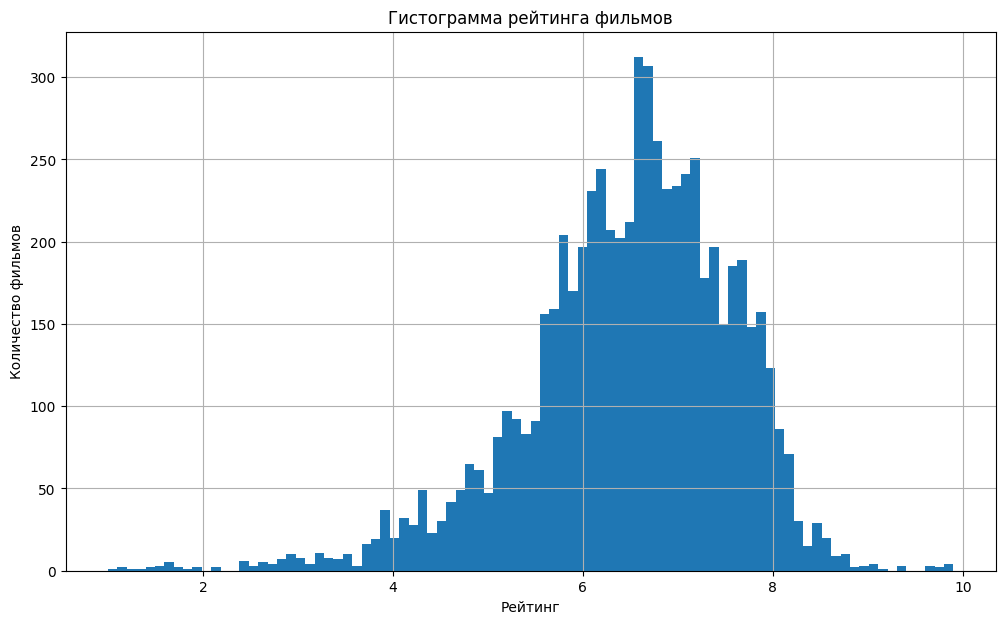

In [63]:
data['ratings'].hist(bins=90, figsize=(12,7))

plt.title('Гистограмма рейтинга фильмов')
plt.xlabel('Рейтинг')
plt.ylabel('Количество фильмов')
plt.grid(True)

plt.show()

Распределение имеет естественный вид. Проблем в данных не видно.

**Изучим столбец genres**

In [64]:
data['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

Фильмы часто имеют несколько жанров.

Создадим новый столбец и перепишем жанры в виде списков.

In [65]:
def convert_to_genres_list(column):
    return column.apply(lambda x: [genre.strip() for genre in x.split(',')] if isinstance(x, str) else [])

In [66]:
data.loc[:, 'genres_list'] = convert_to_genres_list(data['genres'])

In [67]:
unique_genres = pd.Series(data['genres_list'].explode().dropna().unique())
unique_genres.sort_values()

23              аниме
18          биография
0              боевик
22            вестерн
3             военный
9            детектив
20            детский
24       для взрослых
19     документальный
1               драма
12            история
6             комедия
25            концерт
16    короткометражка
8            криминал
2           мелодрама
21             музыка
15         мультфильм
7              мюзикл
27            новости
10        приключения
28        реальное ТВ
13           семейный
11              спорт
5             триллер
14              ужасы
4          фантастика
26         фильм-нуар
17            фэнтези
dtype: object

In [68]:
data.head(1)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,production_country_list,genres_list
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",2450.0,[США],"[боевик, драма, мелодрама]"


Неявных дубликатов нет. Данные обработаны без ошибок.

**Изучим столбец financing_source**

In [69]:
data['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

Имеется два источника финансирования фильмов: Министерство культуры, Фонд кино. Два источника могут финансировать одновременно.

**Промежуточный итог:**

В ходе изучения столбцов с категориальными данными:
* Данные очищены от пробелов в начале и конце строк.
* Обработаны неявные дубликаты в столбце с типами фильмов.
* Ошибки в названиях стран были поправлены. Страны производста были записаны в новый столбец в виде списков
* Жанры также переписаны в новый столбец в виде списков.

**2.5 Анализ количественных признаков**

К столбцам с  количественными данными относятся refundable_support, nonrefundable_support, budget, box_office

**Изучим столбец box_office**

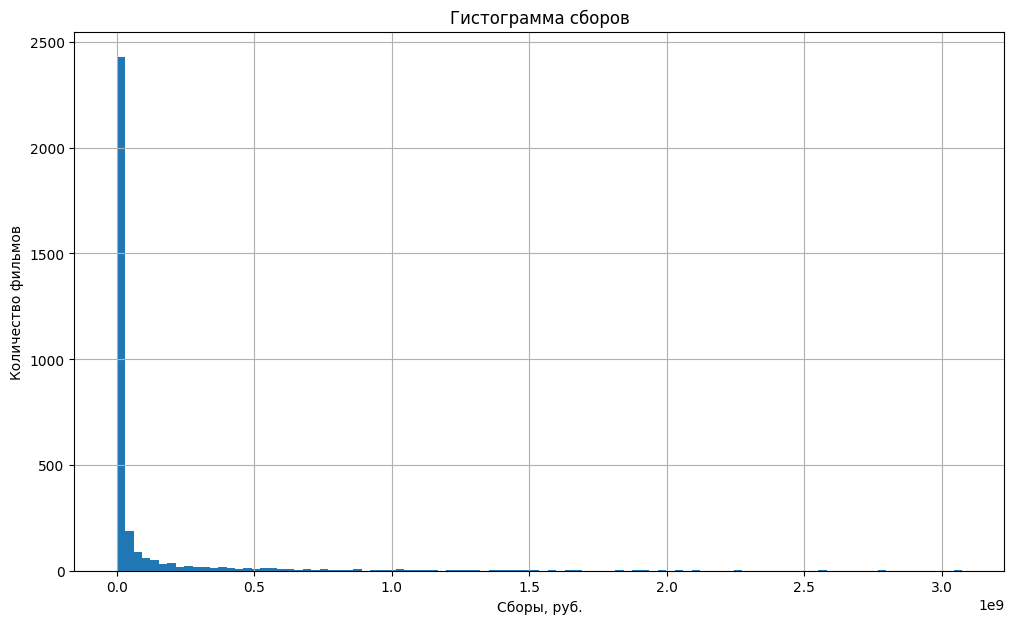

In [70]:
data['box_office'].hist(bins=100, figsize=(12,7))

plt.title('Гистограмма сборов')
plt.xlabel('Сборы, руб.')
plt.ylabel('Количество фильмов')
plt.grid(True)

plt.show()

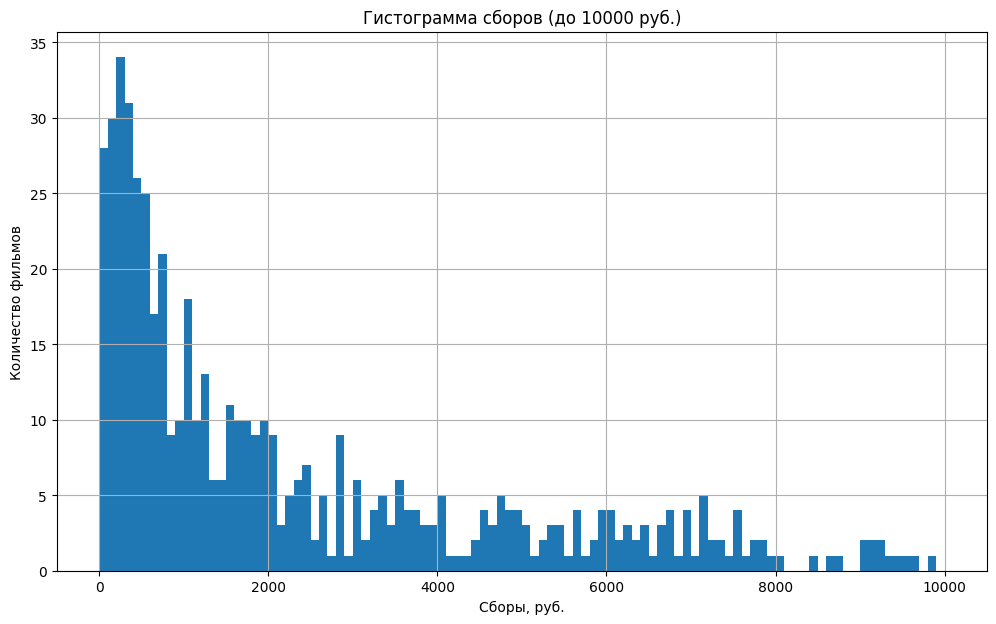

In [71]:
data['box_office'].hist(bins=100, range=(0, 10000), figsize=(12,7))

plt.title('Гистограмма сборов (до 10000 руб.)')
plt.xlabel('Сборы, руб.')
plt.ylabel('Количество фильмов')
plt.grid(True)

plt.show()

Много фильмов имеют очень маленькие сборы. Посмотрим на них внимательнее.

In [72]:
data[data['box_office'] < 10000]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,production_country_list,genres_list
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",2450.0,[США],"[боевик, драма, мелодрама]"
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",200.0,[СССР],"[мелодрама, комедия]"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",710.0,[Франция],"[комедия, криминал]"
14,Отель /По мотивам пьесы Джона Уэбстера/,221008812,2012-01-27T12:00:00.000Z,Художественный,"Кэтлей, Отель Продакшнс, Мунстоун Интертейнмен...","Великобритания, Италия",Майк Фиггис,"Этчи Стро, Анни Стюарт, Майк Фиггис",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.0,"комедия,мелодрама",1920.0,"[Великобритания, Италия]","[комедия, мелодрама]"
15,Председатель,111014916,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,А.Салтыков,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,драма,7104.0,[СССР],[драма]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3153,Снежная битва,124004215,2015-12-01T12:00:00.000Z,Анимационный,КарпеДиэм Фильм энд ТиВи,Канада,"Франсуа Бриссон, Жан-Франсуа Пуле",Софи Рой,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,5.8,мультфильм,1530.0,[Канада],[мультфильм]
3154,Волна,121024215,2015-12-01T12:00:00.000Z,Художественный,"Фантефилм, Филм и Васт",Норвегия,Роар Утхауг,"Мартин Сандлэнд, Арье Хейденстром",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.4,"триллер,драма",9270.0,[Норвегия],"[триллер, драма]"
3155,Маленький принц (2015),124004115,2015-12-01T12:00:00.000Z,Анимационный,"Оникс Фильм, Оранж Студио, Он Интертейнмент, П...",Франция,Марк Осборн,"Алексис Вонарб, Дмитрий Рассам, Антон Сумаш",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.9,"мультфильм,фэнтези,драма",400.0,[Франция],"[мультфильм, фэнтези, драма]"
3156,МУЛЬТ в кино. Выпуск № 21,114003815,2015-12-23T12:00:00.000Z,Анимационный,"ООО ""Паровоз"", ЗАО ""Аэроплан"", ООО ""КиноАтис"",...",Россия,"А.Миронов, Р.Верещак, А.Грибков, А.Соколов и др.","Г.Васильев, И.Попов, М.Мэннис, Т.Цыварева, В.В...",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,360.0,[Россия],[]


In [73]:
data[data['title'] == 'Маленький принц (2015)']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,production_country_list,genres_list
3155,Маленький принц (2015),124004115,2015-12-01T12:00:00.000Z,Анимационный,"Оникс Фильм, Оранж Студио, Он Интертейнмент, П...",Франция,Марк Осборн,"Алексис Вонарб, Дмитрий Рассам, Антон Сумаш",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.9,"мультфильм,фэнтези,драма",400.0,[Франция],"[мультфильм, фэнтези, драма]"


Согласно сайту Кинопоиск https://www.kinopoisk.ru/film/572553/box/ у мультфильма Маленький принц были сборы в России $2985642.
Значит в таблице либо ошибка, либо имеется не вся информация о выданных прокатных удостоверениях и сборах.

**Изучим столбцы refundable_support, nonrefundable_support, budget**

In [74]:
data.isna().sum()

title                         0
pu_number                     0
show_start_date               0
type                          0
film_studio                   0
production_country            0
director                      0
producer                    564
age_restriction               0
refundable_support         7124
nonrefundable_support      7124
budget                     7124
financing_source           7124
ratings                     947
genres                      956
box_office                 4302
production_country_list       0
genres_list                   0
dtype: int64

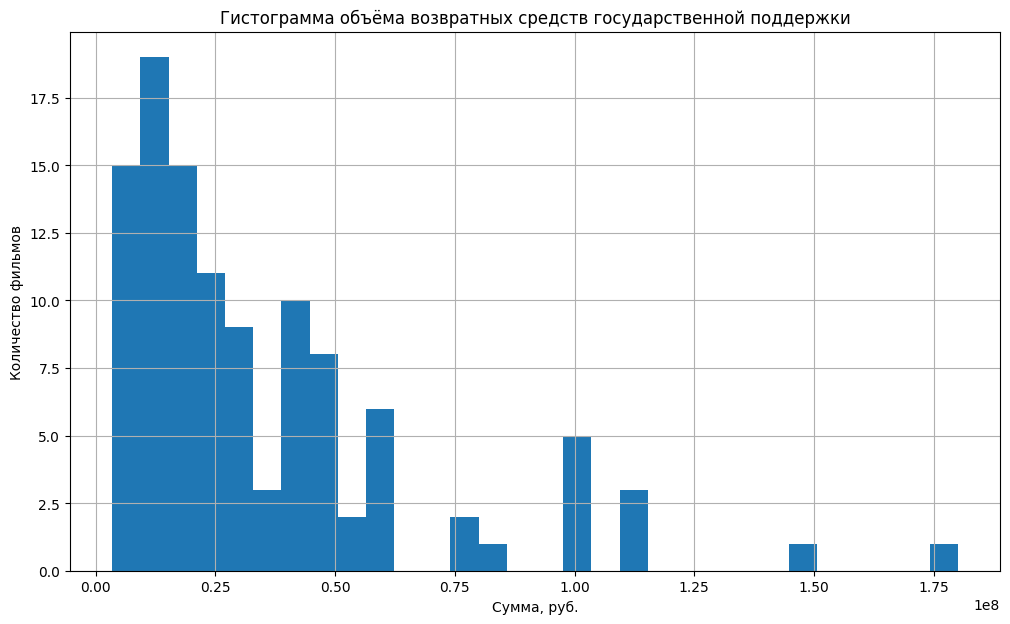

In [75]:
data[data['refundable_support'] > 0]['refundable_support'].hist(bins=30, figsize=(12,7))

plt.title('Гистограмма объёма возвратных средств государственной поддержки')
plt.xlabel('Сумма, руб.')
plt.ylabel('Количество фильмов')
plt.grid(True)

plt.show()

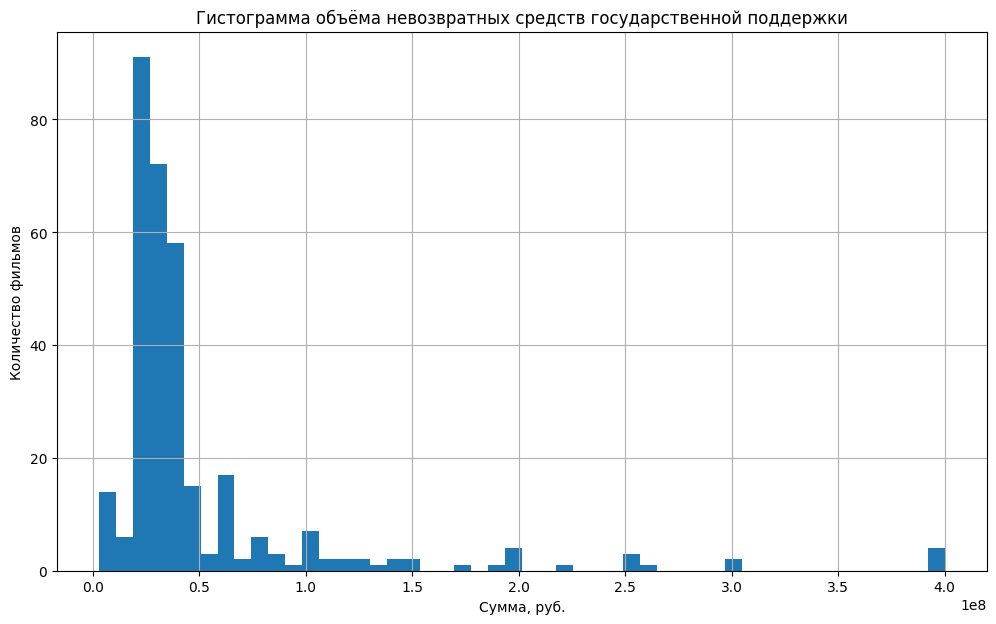

In [76]:
data[data['nonrefundable_support'] > 0]['nonrefundable_support'].hist(bins=50, figsize=(12,7))

plt.title('Гистограмма объёма невозвратных средств государственной поддержки')
plt.xlabel('Сумма, руб.')
plt.ylabel('Количество фильмов')
plt.grid(True)

plt.show()

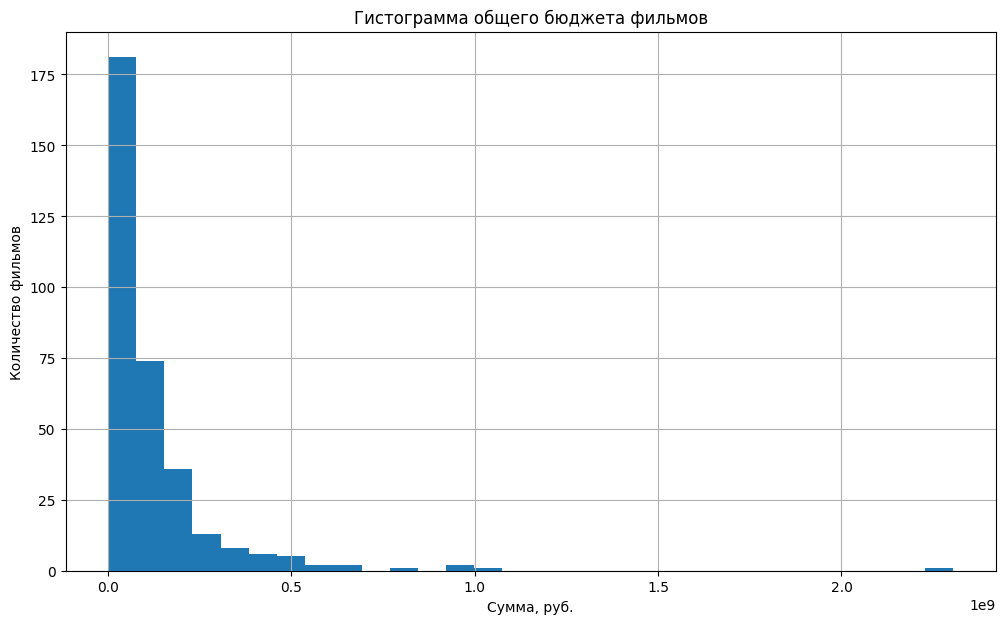

In [77]:
data['budget'].hist(bins=30, figsize=(12,7))

plt.title('Гистограмма общего бюджета фильмов')
plt.xlabel('Сумма, руб.')
plt.ylabel('Количество фильмов')
plt.grid(True)

plt.show()

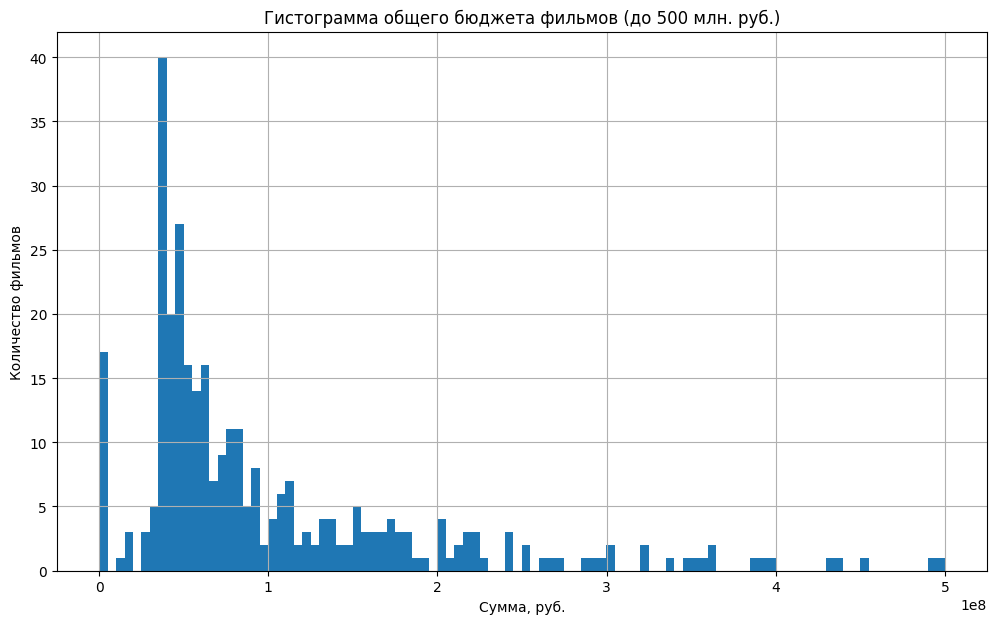

In [78]:
data[data['budget'] < 500000000]['budget'].hist(bins=100, figsize=(12,7))

plt.title('Гистограмма общего бюджета фильмов (до 500 млн. руб.)')
plt.xlabel('Сумма, руб.')
plt.ylabel('Количество фильмов')
plt.grid(True)

plt.show()

Распределения условно можно назвать схожими с распределением Пуассона.

Поищем фильмы с нулевым бюджетом. 

In [79]:
data[data['budget'] == 0]['title'].count()

np.int64(17)

In [80]:
data[data['budget'] == 0]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,production_country_list,genres_list
2053,14+,111023614,2014-12-19T12:00:00.000Z,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,3.189363e+08,[Россия],[мелодрама]
2058,Дуxless 2,111000415,2015-01-26T12:00:00.000Z,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,1.316358e+08,[Россия],[драма]
2472,Воин (2015),111017315,2015-09-28T12:00:00.000Z,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",8.459305e+06,[Россия],"[боевик, драма, криминал]"
2532,Бармен.,111009615,2015-05-26T12:00:00.000Z,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",3.584500e+04,[Россия],"[комедия, фэнтези]"
2615,Савва. Сердце воина,114001715,2015-07-21T12:00:00.000Z,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.376727e+09,[Россия],"[мультфильм, приключения, фэнтези]"
2684,Тряпичный союз,111010215,2015-06-08T12:00:00.000Z,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",3.195765e+06,[Россия],"[комедия, драма]"
2788,Срочно выйду замуж,111017115,2015-09-30T12:00:00.000Z,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",1.035312e+06,[Россия],"[комедия, мелодрама]"
2874,Помню - не помню!,111004916,2016-03-01T12:00:00.000Z,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,6.607378e+06,[Россия],[комедия]
3047,Любовь с ограничениями,111008216,2016-04-29T12:00:00.000Z,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",1.101928e+06,[Россия],"[комедия, мелодрама]"
3565,Притяжение (2016),111018116,2016-12-16T12:00:00.000Z,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,NaN,[Россия],[фантастика]


В таблице имеются фильмы с нулевым бюджетом. Посмотрим сумму гос. поддержки таких фильмов.

In [81]:
print('refundable_support:', data[data['budget'] == 0]['refundable_support'].sum())
print('nonrefundable_support:', data[data['budget'] == 0]['nonrefundable_support'].sum())

refundable_support: 284000000.0
nonrefundable_support: 1107969465.0


В данных строках имеется явная ошибка. Однако данные фильмы имеют большую государственную поддержку. Удалив данные фильмы мы потеряем часть важной информации.

Заполним данные о бюджете для этих фильмов. Информацию поищем в интернете.

In [82]:
film_titles = [
    '14+', 'Дуxless 2', 'Воин (2015)', 'Бармен.', 'Савва. Сердце воина', 
    'Тряпичный союз', 'Срочно выйду замуж', 'Помню - не помню!', 
    'Любовь с ограничениями', 'Притяжение (2016)', 'Чудо-юдо', 
    'Мифы', 'Селфи', 'Два хвоста', 'Принцесса и дракон', 
    'Баба Яга', 'Большое путешествие'
]

budgets = {
    '14+': 50000000,
    'Духless 2': 150000000,
    'Воин (2015)': 300000000,
    'Бармен.': 60000000,
    'Савва. Сердце воина': 1000000000,
    'Тряпичный союз': 120000000,
    'Срочно выйду замуж': 70000000,
    'Помню - не помню!': 60000000,
    'Любовь с ограничениями': 100000000,
    'Притяжение (2016)': 380000000,
    'Чудо-юдо': 144000000,
    'Мифы': 150000000,
    'Селфи': 100000000,
    'Два хвоста': 150000000,
    'Принцесса и дракон': 220000000,
    'Баба Яга': 220000000,
    'Большое путешествие': 190000000
}

data.loc[data['title'].isin(film_titles), 'budget'] = data['title'].map(budgets)
data[data['budget'] == 0]['title'].count()

np.int64(0)

Фильмов с нулевым бюджетом не осталось.

**Промежуточные итоги:**

Были изучены столбцы с количественными значениями.

Были обработаны строки с нулевым бюджетом.

**2.6 Добавление новых признаков**

Создадим столбец с информацией о годе проката.

In [83]:
data['year'] = pd.to_datetime(data['show_start_date']).dt.year
data.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,production_country_list,genres_list,year
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",2.450000e+03,[США],"[боевик, драма, мелодрама]",2015
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",6.104000e+04,[СССР],"[драма, военный]",2016
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",1.530300e+08,[США],"[фантастика, боевик, триллер]",2016
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",1.226096e+07,[США],"[фантастика, боевик, триллер]",2016
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",1.636841e+08,[США],"[фантастика, боевик, триллер]",2015


Создадим два столбца с именем и фамилией главного режиссёра и основным жанром фильма.

In [84]:
def get_first(column):
    if pd.isna(column):
        return None
    pieces = column.split(',')
    return pieces[0] 

data['main_director'] = data['director'].apply(get_first)
data['main_genre'] = data['genres'].apply(get_first)
data.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,production_country_list,genres_list,year,main_director,main_genre
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",2.450000e+03,[США],"[боевик, драма, мелодрама]",2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",6.104000e+04,[СССР],"[драма, военный]",2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",1.530300e+08,[США],"[фантастика, боевик, триллер]",2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",1.226096e+07,[США],"[фантастика, боевик, триллер]",2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",1.636841e+08,[США],"[фантастика, боевик, триллер]",2015,Тимур Бекмамбетов,фантастика


Посмотрим на то, как соотносятся госфинансирование и общие бюджеты фильмов. Cоздадим новый столбец с долей госфинансирования в бюджете фильма.

In [85]:
def count_gos_fin_share(refundable_support, nonrefundable_support, budget):
    if budget == np.nan:
        return np.nan
    else:
        return (refundable_support + nonrefundable_support) / budget

data['gos_fin_share'] = data.apply(lambda row: count_gos_fin_share(row['refundable_support'], row['nonrefundable_support'], row['budget']), axis=1)
data[data['gos_fin_share'].isna() == False].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,production_country_list,genres_list,year,main_director,main_genre,gos_fin_share
1281,Пока еще жива,111005313,2013-10-11T12:00:00.000Z,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма,мелодрама",165890.0,[Россия],"[драма, мелодрама]",2013,А.Атанесян,драма,0.333703
1448,Бесславные придурки,111003314,2014-03-28T12:00:00.000Z,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,NaN,NaN,4280693.5,[Россия],[],2014,А.Якимчук,None,0.700000
1498,Невидимки,111004213,2013-09-10T12:00:00.000Z,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",4321194.6,[Россия],"[комедия, фантастика]",2013,Р.Давлетьяров,комедия,0.612691
1524,БЕРЦЫ,111004314,2014-05-05T12:00:00.000Z,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,1869220.0,[Россия],[драма],2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.690095
1792,Братья Ч,111004414,2014-04-23T12:00:00.000Z,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,30778027.4,[Россия],[драма],2014,М.Угаров,драма,0.624764


In [86]:
data['gos_fin_share'].describe()

count    331.000000
mean       0.514300
std        0.172922
min        0.044043
25%        0.368006
50%        0.588731
75%        0.656599
max        0.947368
Name: gos_fin_share, dtype: float64

In [87]:
data[data['nonrefundable_support'].isna() == False]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,production_country_list,genres_list,year,main_director,main_genre,gos_fin_share
1281,Пока еще жива,111005313,2013-10-11T12:00:00.000Z,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма,мелодрама",165890.0,[Россия],"[драма, мелодрама]",2013,А.Атанесян,драма,0.333703
1448,Бесславные придурки,111003314,2014-03-28T12:00:00.000Z,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,NaN,NaN,4280693.5,[Россия],[],2014,А.Якимчук,None,0.700000
1498,Невидимки,111004213,2013-09-10T12:00:00.000Z,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",4321194.6,[Россия],"[комедия, фантастика]",2013,Р.Давлетьяров,комедия,0.612691
1524,БЕРЦЫ,111004314,2014-05-05T12:00:00.000Z,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,1869220.0,[Россия],[драма],2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.690095
1792,Братья Ч,111004414,2014-04-23T12:00:00.000Z,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,30778027.4,[Россия],[драма],2014,М.Угаров,драма,0.624764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26T12:00:00.000Z,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.0,400000000.0,980000000.0,Фонд кино,6.0,"история,биография,драма",NaN,[Россия],"[история, биография, драма]",2019,А.Кравчук,история,0.510204
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20T12:00:00.000Z,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.0,0.0,190000000.0,Фонд кино,6.7,"мультфильм,приключения,семейный",NaN,[Россия],"[мультфильм, приключения, семейный]",2019,Д.Шмидт,мультфильм,0.526316
7474,Вторжение,111022519,2019-12-23T12:00:00.000Z,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,400000000.0,944000000.0,Фонд кино,5.7,"фантастика,боевик",NaN,[Россия],"[фантастика, боевик]",2019,Ф.Бондарчук,фантастика,0.529661
7476,Я свободен,111023019,2019-12-26T12:00:00.000Z,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,30000000.0,46154000.0,Министерство культуры,5.9,драма,NaN,[Россия],[драма],2019,И.Северов,драма,0.649998


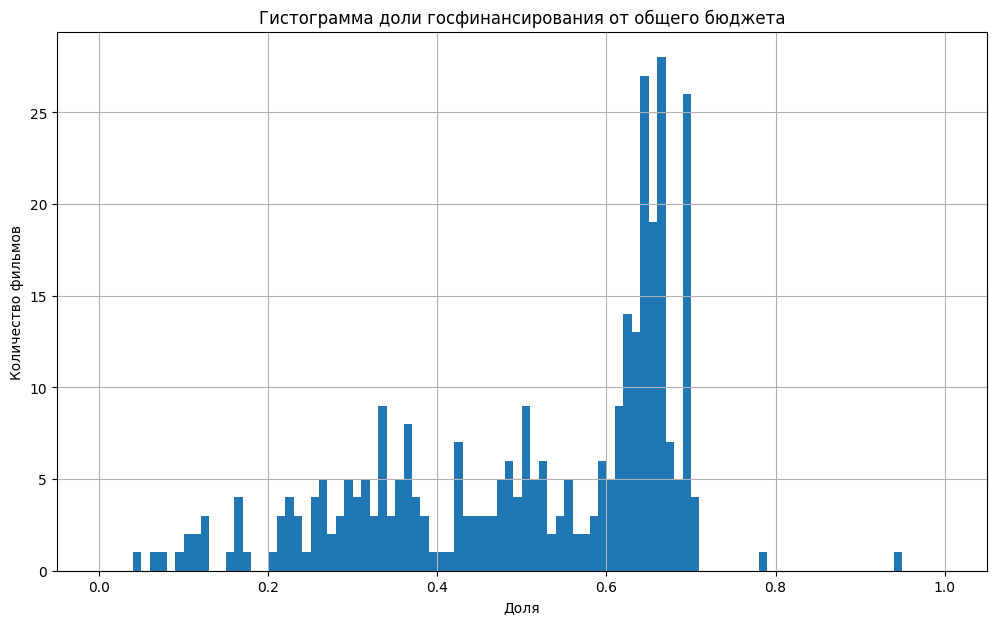

In [88]:
data['gos_fin_share'].hist(bins=100, range=(0,1), figsize=(12,7))

plt.title('Гистограмма доли госфинансирования от общего бюджета')
plt.xlabel('Доля')
plt.ylabel('Количество фильмов')
plt.grid(True)

plt.show()

Как и должно быть, все доли государственного финансирования лежат в диапазоне от 0 до 1.

**Промежуточные итоги:**

Созданы столбцы с главным режиссером и главным жанром фильма.

Добавлен столбец с долей государственного софинансирования фильмов.

<a class='anchor' id="link3"></a>
## 3 Исследовательский анализ данных

Посмотрим сколько фильмов выходило в прокат каждый год.

In [89]:
movies_by_year = data.groupby('year')['title'].count()
movies_by_year

year
2010    980
2011    620
2012    592
2013    629
2014    805
2015    705
2016    817
2017    505
2018    878
2019    925
Name: title, dtype: int64

In [90]:
shows_by_year = data[data['box_office'].isna() == False].groupby('year')['title'].count()
shows_by_year

year
2012    592
2013    629
2014    804
2015    693
2016    423
2017     13
Name: title, dtype: int64

In [91]:
share = shows_by_year.sum() / movies_by_year.sum()
share

np.float64(0.4230150214592275)

In [92]:
share_by_year = shows_by_year / movies_by_year
share_by_year

year
2010         NaN
2011         NaN
2012    1.000000
2013    1.000000
2014    0.998758
2015    0.982979
2016    0.517748
2017    0.025743
2018         NaN
2019         NaN
Name: title, dtype: float64

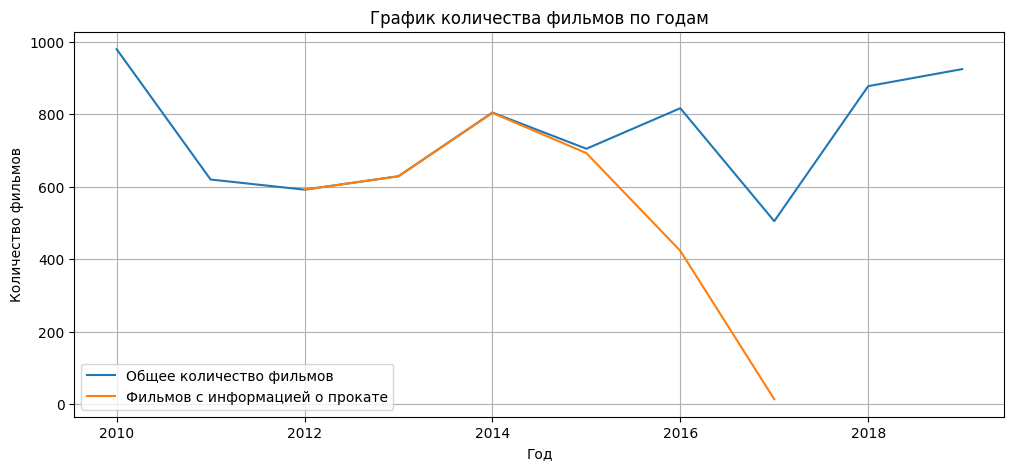

In [93]:
plt.figure(figsize=(12, 5))
movies_by_year.plot(grid=True, label='Общее количество фильмов')
shows_by_year.plot(grid=True, label='Фильмов с информацией о прокате')
plt.title('График количества фильмов по годам')
plt.xlabel('Год')
plt.ylabel('Количество фильмов')
plt.legend()


plt.show()

В таблице представлена информация о прокатных удостоверениях с 2010 по 2019 годы.

Информация о прокате имеется только за 2012-2017 годы. 42% фильмов имеют информацию о суммах сборов. При этом за 2012, 2013 годы имеется информация о прокате всех фильмов. За 2014, 2015 годы имеется информация о прокате 99,9% и 98,3% фильмов соответственно. За 2016, 2017 годы только 51,7% и 2,6% фильмов соответственно имеют данные о сумме сборов.

Посмотрим как менялась динамика проката по годам.

In [94]:
box_office_sum_by_year = data.groupby('year')['box_office'].sum()
box_office_sum_by_year

year
2010    0.000000e+00
2011    0.000000e+00
2012    3.436016e+10
2013    5.882444e+10
2014    7.441233e+10
2015    4.911474e+10
2016    2.337793e+10
2017    7.308125e+08
2018    0.000000e+00
2019    0.000000e+00
Name: box_office, dtype: float64

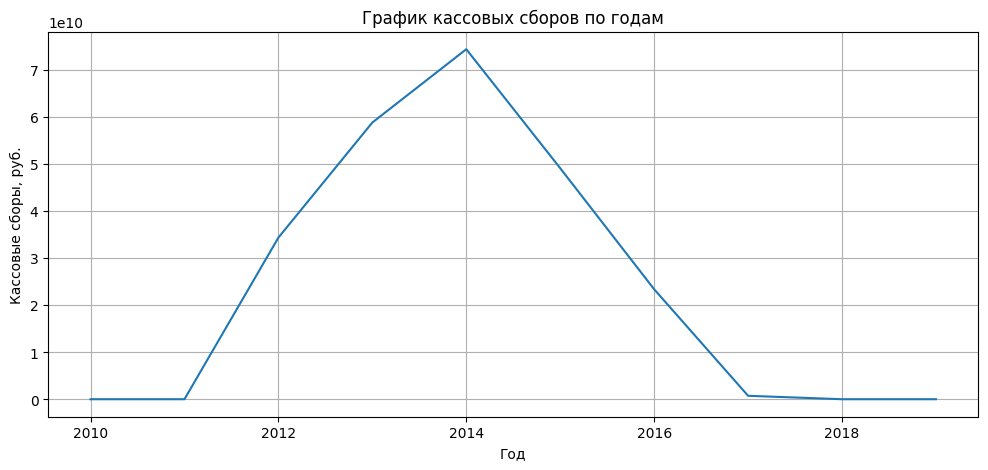

In [95]:
plt.figure(figsize=(12, 5))
box_office_sum_by_year.plot(grid=True)
plt.title('График кассовых сборов по годам')
plt.xlabel('Год')
plt.ylabel('Кассовые сборы, руб.')

plt.show()

В соответствии с предоставленными данными сумарные объем кинопроката росли с 2011 по 2014 годы, и снижались с 2014 по 2018.
Наиболее вероятно, что такие показатели связаны с тем, что за 2012 - 2014 годы данные о прокате представлены полнее всего.

Посчитаем среднюю и медианную сумму сборов для каждого года.

In [96]:
box_office_mean = data.pivot_table(values='box_office', index='year')
box_office_mean

,box_office
year,
2012,5.804081e+07
2013,9.352057e+07
2014,9.255265e+07
2015,7.087264e+07
2016,5.526698e+07
2017,5.621635e+07


In [97]:
box_office_median = data.pivot_table(values='box_office', index='year', aggfunc='median')
box_office_median

,box_office
year,
2012,2111593.01
2013,4002584.00
2014,3545161.50
2015,1463723.97
2016,991888.00
2017,2399461.50


<Figure size 1200x500 with 0 Axes>

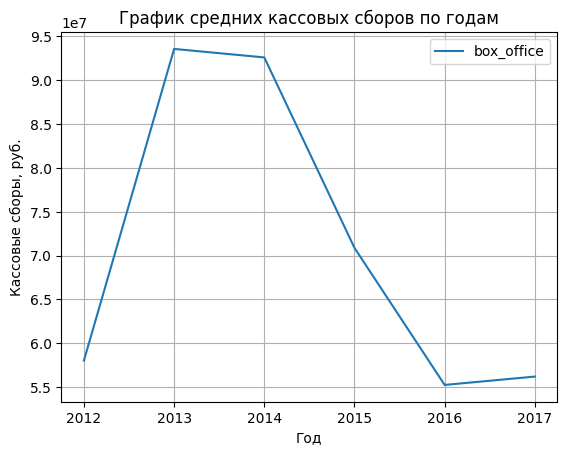

In [98]:
plt.figure(figsize=(12, 5))
box_office_mean.plot(grid=True)
plt.title('График средних кассовых сборов по годам')
plt.xlabel('Год')
plt.ylabel('Кассовые сборы, руб.')

plt.show()

<Figure size 1200x500 with 0 Axes>

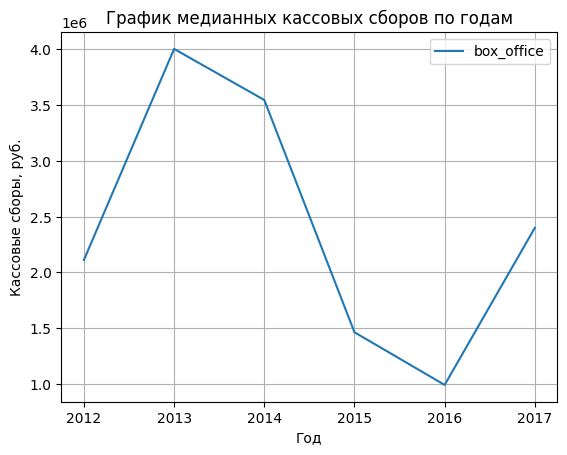

In [99]:
plt.figure(figsize=(12, 5))
box_office_median.plot(grid=True)
plt.title('График медианных кассовых сборов по годам')
plt.xlabel('Год')
plt.ylabel('Кассовые сборы, руб.')

plt.show()

Наиболее кассовые фильмы выходили в 2013, 2014 годах. Это видно на обоих графиках.

Исследуем как возрастное ограничение аудитории влияет на сборы в прокате. 

In [100]:
box_office_by_age_restriction = data[data['year'].isin([2015, 2016, 2017, 2018, 2019])].pivot_table(values='box_office', index='year', columns='age_restriction')
box_office_by_age_restriction

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
year,,,,,
2015,9.987330e+07,4.286685e+07,7.954376e+07,7.690103e+07,5.889574e+07
2016,7.668972e+07,5.124013e+07,5.534932e+07,5.681442e+07,4.240700e+07
2017,1.982700e+05,9.299642e+05,2.475331e+07,9.690253e+07,NaN


In [101]:
# поменяю столбцы местами, чтобы выглядело красивее
box_office_by_age_restriction = box_office_by_age_restriction[[
    '«0+» - для любой зрительской аудитории',
    '«6+» - для детей старше 6 лет',
    '«12+» - для детей старше 12 лет',
    '«16+» - для детей старше 16 лет',
    '«18+» - запрещено для детей'
]]
box_office_by_age_restriction

age_restriction,«0+» - для любой зрительской аудитории,«6+» - для детей старше 6 лет,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей
year,,,,,
2015,9.987330e+07,5.889574e+07,4.286685e+07,7.954376e+07,7.690103e+07
2016,7.668972e+07,4.240700e+07,5.124013e+07,5.534932e+07,5.681442e+07
2017,1.982700e+05,NaN,9.299642e+05,2.475331e+07,9.690253e+07


<Figure size 1200x500 with 0 Axes>

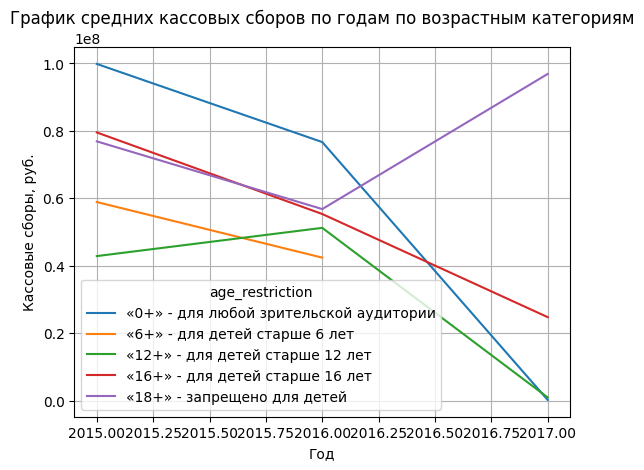

In [102]:
plt.figure(figsize=(12, 5))
box_office_by_age_restriction.plot(grid=True)
plt.title('График средних кассовых сборов по годам по возрастным категориям')
plt.xlabel('Год')
plt.ylabel('Кассовые сборы, руб.')

plt.show()

Исследуем период с 2015 по 2017 год.

In [103]:
box_office_by_age_restriction = data[data['year'].isin([2012, 2013, 2014, 2015, 2016])].pivot_table(values='box_office', index='year', columns='age_restriction')
# поменяю столбцы местами, чтобы выглядело красивее
box_office_by_age_restriction = box_office_by_age_restriction[[
    '«0+» - для любой зрительской аудитории',
    '«6+» - для детей старше 6 лет',
    '«12+» - для детей старше 12 лет',
    '«16+» - для детей старше 16 лет',
    '«18+» - запрещено для детей'
]]
box_office_by_age_restriction

age_restriction,«0+» - для любой зрительской аудитории,«6+» - для детей старше 6 лет,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей
year,,,,,
2012,8.517109e+07,3.791932e+07,2.560415e+07,3.758521e+07,1.241885e+08
2013,9.768343e+07,1.068135e+08,8.766848e+07,1.068518e+08,6.419194e+07
2014,6.679688e+07,4.744253e+07,9.791650e+07,9.547703e+07,1.123950e+08
2015,9.987330e+07,5.889574e+07,4.286685e+07,7.954376e+07,7.690103e+07
2016,7.668972e+07,4.240700e+07,5.124013e+07,5.534932e+07,5.681442e+07


<Figure size 1200x500 with 0 Axes>

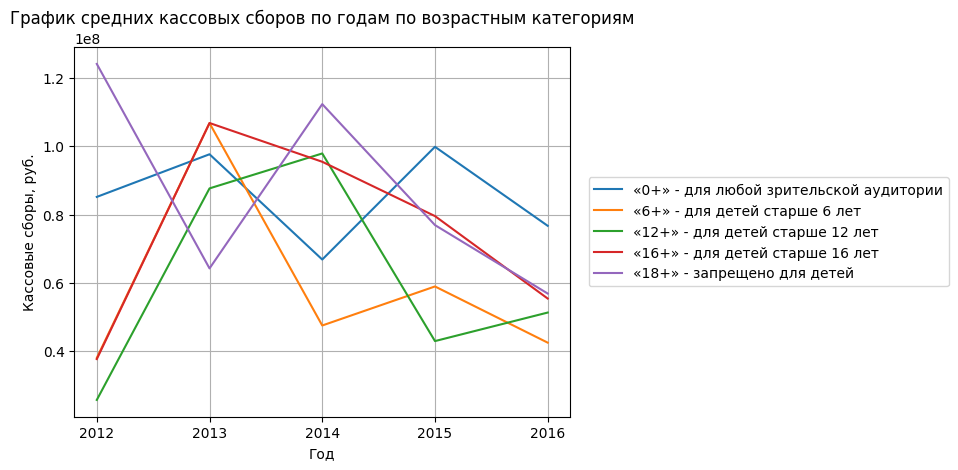

In [104]:
plt.figure(figsize=(12, 5))
box_office_by_age_restriction.plot(grid=True)
plt.title('График средних кассовых сборов по годам по возрастным категориям')
plt.xlabel('Год')
plt.ylabel('Кассовые сборы, руб.')
plt.legend(loc='center', bbox_to_anchor=(1.4, 0.5))
plt.xticks(np.arange(2012, 2017, 1))

plt.show()

In [105]:
box_office_by_age_restriction.sum().sort_values(ascending=False)

age_restriction
«18+» - запрещено для детей               4.344909e+08
«0+» - для любой зрительской аудитории    4.262144e+08
«16+» - для детей старше 16 лет           3.748071e+08
«12+» - для детей старше 12 лет           3.052961e+08
«6+» - для детей старше 6 лет             2.934781e+08
dtype: float64

Средние кассовые сборы разрозненно меняются по годам. Нельзя выделить каких-либо трендов.

Можно сказать что фильмы категории "0+" приносят наиболее стабильные средние сборы.

Фильмы "6+" с 2014 года приносили наименьшие кассовые сборы.

Суммарно самые кассовые фильмы в категории "18+". Затем по убыванию следуют "0+", "16+", "16+". Наименне кассовые фильмы в категории "6+".

**Промежуточные итоги:**

В ходе исследовательского анализа данных было исследовано количество фильмов, выходящих в прокат каждый год. Были исследованы сммарные и медианные сборы по годам. Определены зависимости сборов от категории возрастных огранчений.

<a class='anchor' id="link4"></a>
## 4 Анализ фильмов с государственной поддержкой

**Оценим общие объемы государственного финансирования кинематографа**

In [106]:
fin_pivot_table = data.pivot_table(values=['refundable_support','nonrefundable_support'], index='year', aggfunc='sum')
fin_pivot_table

,nonrefundable_support,refundable_support
year,,
2010,0.000000e+00,0.0
2011,0.000000e+00,0.0
2012,0.000000e+00,0.0
2013,1.343479e+08,0.0
2014,5.010023e+08,71000000.0
2015,3.019088e+09,637153119.0
2016,3.381655e+09,921500000.0
2017,2.464625e+09,719346881.0
2018,2.784969e+09,662000000.0


<Figure size 1200x500 with 0 Axes>

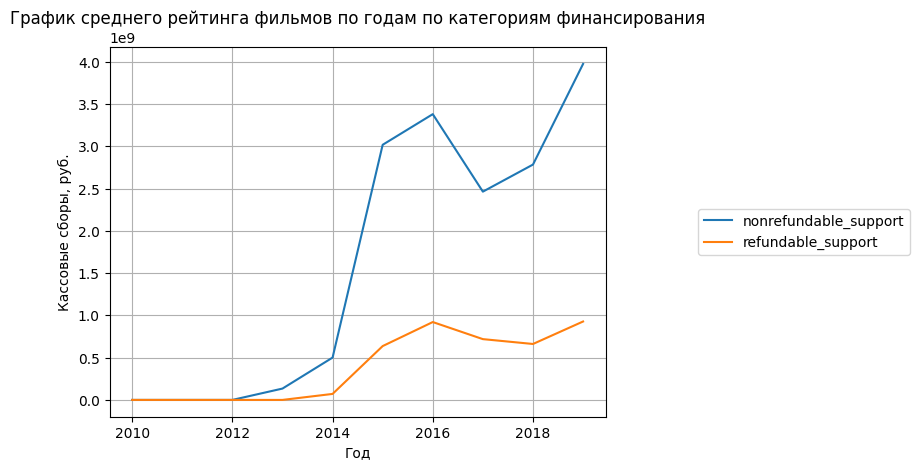

In [107]:
plt.figure(figsize=(12, 5))
fin_pivot_table.plot(grid=True)
plt.title('График среднего рейтинга фильмов по годам по категориям финансирования')
plt.xlabel('Год')
plt.ylabel('Кассовые сборы, руб.')
plt.legend(loc='center', bbox_to_anchor=(1.4, 0.5))

plt.show()

In [108]:
fin_pivot_table.sum().sum()

np.float64(20200688312.0)

**Промежуточный итог:**

Объемы как возвратных средств так и невозвратных средств осударственной поддержки росли до 2016 года. В 2017, 2018 году финансирование было уменьшено. 2019 год стал рекордным по объемам государственной поддержки. За 2013-2019 годы суммарные расходы бюджета на финансирование российского кинематографа составили более 18.8 млрд. руб.

**Исследуем финансовую окупаемость фильмов с государственной поддержкой**

Создадим столбец с суммарной государственной поддержкой.

In [109]:
data['support'] = data['refundable_support'] + data['nonrefundable_support']

Посчитаем общие сборы фильмов c гос. поддежкой.

In [110]:
data[data['support'] != 0]['box_office'].sum()

np.float64(240820418269.66998)

Фильмы с гос. поддержкой собрали в сумме более 238 млрд. руб., что многократно больше помощи в 18.8 млрд. руб.

Найдем количество фильмов, которые собрали в прокате меньше суммарного объема поддержки.

In [111]:
data['support_share'] = data[data['support'] != 0]['support'] / data[data['support'] != 0]['box_office']
data[data['support_share'] > 1]['title'].count()

np.int64(97)

У 92 фильмов кассовые сборы не покрыли расходов государства.

Посмотрим сколько фильмов собрали в прокате меньше объёма **возвратных** средств государственной поддержки.

In [112]:
data['refundable_share'] = data[data['support'] != 0]['refundable_support'] / data[data['support'] != 0]['box_office']
data[data['refundable_share'] > 1]['title'].count()

np.int64(29)

Оценим объем потерянных средств.

In [113]:
data[data['refundable_share'] > 1]['refundable_support'].sum() - data[data['refundable_share'] > 1]['box_office'].sum()

np.float64(609627501.87)

Кассовые сборы 26 фильмов не покрыли объёма возвратных средств государственной поддержки

**Промежуточный итог:**

Общие кассовые сборы фильмов с гос. поддержкой многократно превосходят объемы гос. финансирования. Однако часть фильмов не окупается в прокате и не может собрать достаточно средств для возврата государственной поддержки.

**Исследуем как государственное финансирование влияет на рейтинги фильмов**

Разделим фильмы на три категории: "Российские без гос.финансирования",  "Российские с гос.финансированием", "Зарубежные".

In [114]:
def classification(country, budget):
    if 'Россия' in country:
        if np.isnan(budget):
            return 'Российские без гос.финансирования'
        else:
            return 'Российские с гос.финансированием'
    else:
        return 'Другие'
data['class'] = data.apply(lambda row: classification(row['production_country_list'], row['budget']), axis=1)

In [115]:
class_pivot_table = data.pivot_table(values='ratings', index='year', columns='class')
class_pivot_table

class,Другие,Российские без гос.финансирования,Российские с гос.финансированием
year,,,
2010,6.859894,6.077632,NaN
2011,6.655814,5.949020,NaN
2012,6.613866,6.084507,NaN
2013,6.619483,5.826923,6.700000
2014,6.604180,6.081373,6.006667
2015,6.436695,5.870667,6.134146
2016,6.453093,6.192105,5.677193
2017,6.405605,5.989655,6.000000
2018,6.389344,6.484810,6.001887


<Figure size 1200x500 with 0 Axes>

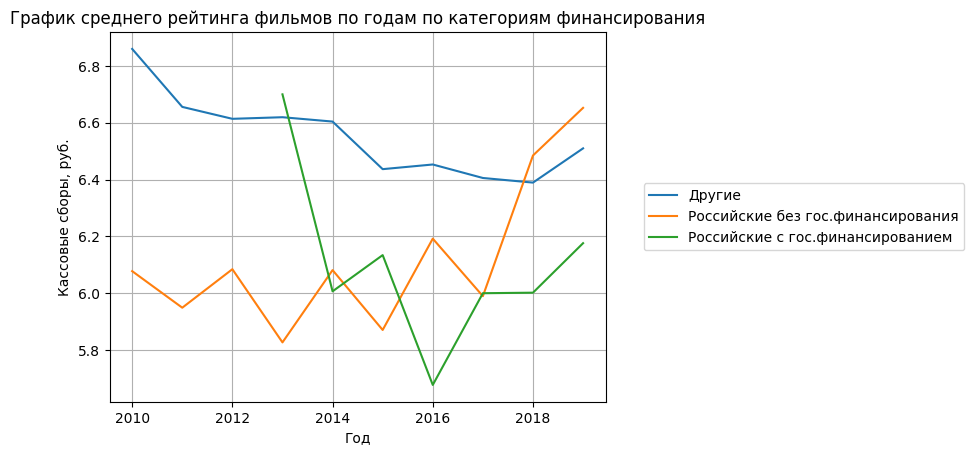

In [116]:
plt.figure(figsize=(12, 5))
class_pivot_table.plot(grid=True)
plt.title('График среднего рейтинга фильмов по годам по категориям финансирования')
plt.xlabel('Год')
plt.ylabel('Кассовые сборы, руб.')
plt.legend(loc='center', bbox_to_anchor=(1.4, 0.5))

plt.show()

In [117]:
data.pivot_table(values='ratings', index='year', columns='class', aggfunc='count')

class,Другие,Российские без гос.финансирования,Российские с гос.финансированием
year,,,
2010,758.0,152.0,NaN
2011,473.0,102.0,NaN
2012,476.0,71.0,NaN
2013,503.0,78.0,2.0
2014,622.0,102.0,15.0
2015,466.0,75.0,82.0
2016,582.0,76.0,57.0
2017,339.0,58.0,39.0
2018,366.0,237.0,53.0


**Промежуточный итог:**

Российские фильмы без гос.финансирования постепенно увеличивают средний рейтинг и в 2019 достигли 6.64. В то время как рейтинг российских фильмов с гос.финансированием стагнирует на уровне 6.1. В 2013 году было всего 2 фильма с гос.финансированием, поэтому относительно высокий рейтинг можно объяснить малой выборкой. 2016 год был относительно провальным для российских фильмов с гос. финансированием. Сроений рейтинг в том году составил 5.69.
Рейтинг фильмов других стран уменьшался с 2010 по 2015, и сейчас колеблется на уровне 6.5.

**Изучим российских режиссеров, продюссеров и киностудии**


Добавим столбцы с основным продюссером и основной студией.

In [118]:
data['main_producer'] = data['producer'].apply(get_first)
data['main_film_studio'] = data['film_studio'].apply(get_first)
data.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,production_country_list,genres_list,year,main_director,main_genre,gos_fin_share,support,support_share,refundable_share,class,main_producer,main_film_studio
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",2.450000e+03,[США],"[боевик, драма, мелодрама]",2015,Кевин Костнер,боевик,NaN,NaN,NaN,NaN,Другие,Дэвид Валдес,Тачстоун Пикчерз
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",6.104000e+04,[СССР],"[драма, военный]",2016,Е.Матвеев,драма,NaN,NaN,NaN,NaN,Другие,None,"Киностудия ""Мосфильм"""
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",1.530300e+08,[США],"[фантастика, боевик, триллер]",2016,Тимур Бекмамбетов,фантастика,NaN,NaN,NaN,NaN,Другие,Джим Лемли,Юниверсал Пикчерз
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",1.226096e+07,[США],"[фантастика, боевик, триллер]",2016,Тимур Бекмамбетов,фантастика,NaN,NaN,NaN,NaN,Другие,Джим Лемли,Юниверсал Пикчерз
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",1.636841e+08,[США],"[фантастика, боевик, триллер]",2015,Тимур Бекмамбетов,фантастика,NaN,NaN,NaN,NaN,Другие,Джим Лемли,Юниверсал Пикчерз


Посмотрим режиссеров, продюссеров и киностудии с наивысшими рейтингами и кассовыми сборами российских фильмов

**Топ-10 режиссеров российских фильмов по среднему рейтингу фильмов:**

In [119]:
df_main_director_ratings_0 = data[((data['class'] == 'Российские без гос.финансирования') | 
                                   (data['class'] == 'Российские с гос.финансированием')) & 
                                   (~data['ratings'].isna())].groupby('main_director')['ratings'].mean().sort_values(ascending=False).head(10)
df_main_director_ratings_0

main_director
Т.Мирошник                           9.9
Е.Шиляева                            9.9
А.Сазонов                            9.8
И.Ромащенко                          9.7
Д.Шабаев                             9.4
М.Косырев-Нестеров                   9.1
Р.Глурджидзе                         9.1
Н.Иванова                            9.1
М.Мошкова                            9.0
Н.Степанова при участии С.Иванова    9.0
Name: ratings, dtype: float64

**Топ-10 режиссеров российских фильмов по суммарному прокату:**

In [120]:
df_main_director_box_office_0 = data[((data['class'] == 'Российские без гос.финансирования') | 
                                      (data['class'] == 'Российские с гос.финансированием')) & 
                                      (~data['box_office'].isna())].groupby('main_director')['box_office'].sum().sort_values(ascending=False).head(10)
df_main_director_box_office_0

main_director
Джонни О'Райлли    1.971005e+09
Аку Лоухимис       1.682680e+09
И.Зайцев           1.655038e+09
Адриан Биньес      1.646581e+09
Д.Туприн           1.570380e+09
М.Фадеев           1.376727e+09
Е.Звездаков        1.307254e+09
А.Кириллов         1.219864e+09
А.Хвостов          1.203696e+09
В.Панжев           1.187875e+09
Name: box_office, dtype: float64

**Топ-10 продюссеров российских фильмов по среднему рейтингу фильмов:**

In [121]:
df_main_producer_ratings_0 = data[((data['class'] == 'Российские без гос.финансирования') | 
                                   (data['class'] == 'Российские с гос.финансированием')) & 
                                   (~data['ratings'].isna())].groupby('main_producer')['ratings'].mean().sort_values(ascending=False).head(10)
df_main_producer_ratings_0

main_producer
К.Терещенко           9.9
Е.Ковалева            9.9
Б.Куломзин            9.8
Д.Руюежин             9.8
Р.Атамалибеков        9.7
М.Косырев-Нестеров    9.1
З.Магалашвили         9.1
Е.Тарковская          8.9
В.Меньшов             8.8
Р.Гарифуллин          8.7
Name: ratings, dtype: float64

**Топ-10 продюссеров российских фильмов по суммарному прокату:**

In [122]:
df_main_producer_box_office_0 = data[((data['class'] == 'Российские без гос.финансирования') | 
                                      (data['class'] == 'Российские с гос.финансированием')) & 
                                      (~data['box_office'].isna())].groupby('main_producer')['box_office'].sum().sort_values(ascending=False).head(10)
df_main_producer_box_office_0

main_producer
Джонни О'Райлли     1.971005e+09
Паули Пентти        1.682680e+09
А.Максимов          1.663167e+09
Агустина Кьярино    1.646581e+09
А.Дугарон           1.570380e+09
А.Чистяков          1.376727e+09
С.Зернов            1.338967e+09
И.Аносов            1.219864e+09
Д.Бенс              1.203696e+09
А.Миндадзе          1.156021e+09
Name: box_office, dtype: float64

**Топ-10 российских студий по среднему рейтингу фильмов:**

In [123]:
df_main_film_studio_ratings_0 = data[((data['class'] == 'Российские без гос.финансирования') | 
                                      (data['class'] == 'Российские с гос.финансированием')) & 
                                      (~data['ratings'].isna())].groupby('main_film_studio')['ratings'].mean().sort_values(ascending=False).head(10)
df_main_film_studio_ratings_0

main_film_studio
ООО "Компания Питон"                   9.9
НП "Студия игрового кино "Лик"         9.9
ИП Вайсман Анатолий Александрович      9.8
ООО "БестМедиа"                        9.8
ООО Студия "АНИМАККОРД"                9.7
ООО "ЮНАЙТЕД МУЛЬТИМЕДИА ПРОДЖЕКТС"    9.7
ООО "Киностудия "МАСТЕР"               9.4
ЗАО "Киностудия "М"-Фильм"             9.1
ООО "Лига Продакшн"                    9.1
ООО Кинокомпания "Вектор"              9.1
Name: ratings, dtype: float64

**Топ-10 российских студий по суммарному прокату:**

In [124]:
df_main_film_studio_box_office_0 = data[((data['class'] == 'Российские без гос.финансирования') | 
                                    (data['class'] == 'Российские с гос.финансированием')) & 
                                    (~data['box_office'].isna())].groupby('main_film_studio')['box_office'].sum().sort_values(ascending=False).head(10)
df_main_film_studio_box_office_0

main_film_studio
ООО "СНАПШОТ ФИЛМЗ ВОСТОК"                            1.971005e+09
Ферст Флор Продакшнз                                  1.682680e+09
ООО "Кинобазза" по  заказу ЗАО "Дирекция Кино"        1.655038e+09
Мороча Филмз                                          1.646581e+09
ООО "МонУла Филмз"                                    1.570380e+09
ООО "Глюкоза Продакшн"                                1.376727e+09
ООО "ТаББаК"                                          1.331214e+09
ООО "Продюсерский центр Киностудии им. М.Горького"    1.326792e+09
ООО Кинокомпания "Прогресс"                           1.219864e+09
Биар ин Майнд Филмз (ИП Хвостов А.А.)                 1.203696e+09
Name: box_office, dtype: float64

**Изучим российских режиссеров, продюссеров и киностудии, получающих государственное финансирование**

Посмотрим режиссеров, продюссеров и киностудии с наивысшими рейтингами и кассовыми сборами российских фильмов

**Топ-10 режиссеров российских фильмов по среднему рейтингу фильмов:**

In [125]:
df_main_director_ratings_1 = data[(data['class'] == 'Российские с гос.финансированием') & 
                                  (~data['ratings'].isna())].groupby('main_director')['ratings'].mean().sort_values(ascending=False).head(10)
df_main_director_ratings_1

main_director
Ю.Кара                               9.4
Н.Степанова при участии С.Иванова    9.0
Р.Прыгунов                           8.2
А.Атанесян                           8.1
А.Попова                             8.0
К.Оганисян                           7.9
В.Татарский                          7.8
А.Андрианов                          7.8
И.Шахназаров                         7.8
М.Михайлова                          7.7
Name: ratings, dtype: float64

**Топ-10 режиссеров российских фильмов по суммарному прокату:**

In [126]:
df_main_director_box_office_1 = data[(data['class'] == 'Российские с гос.финансированием') & 
                                     (~data['box_office'].isna())].groupby('main_director')['box_office'].sum().sort_values(ascending=False).head(10)
df_main_director_box_office_1

main_director
М.Фадеев        1.376727e+09
А.Миндадзе      1.125243e+09
А.Стриженов     1.121949e+09
Д.Дьяченко      7.394853e+08
Ф.Абрютин       6.274220e+08
А.Федорченко    4.882237e+08
К.Дружинин      4.794060e+08
Ю.Фетинг        4.535039e+08
А.Зайцев        3.189363e+08
К.Шипенко       2.160002e+08
Name: box_office, dtype: float64

**Топ-10 продюссеров российских фильмов по среднему рейтингу фильмов:**

In [127]:
df_main_producer_ratings_1 = data[(data['class'] == 'Российские с гос.финансированием') & 
                                  (~data['ratings'].isna())].groupby('main_producer')['ratings'].mean().sort_values(ascending=False).head(10)
df_main_producer_ratings_1

main_producer
Ю.Кара             9.40
В.Тодоровский      8.50
В.Маслов           8.20
А.Атанесян         8.10
И.Добровольский    8.00
Е.Бабенко          8.00
С.Кикнавелидзе     7.95
К.Оганисян         7.90
Ю.Бахшиев          7.80
С.Бобза            7.80
Name: ratings, dtype: float64

**Топ-10 продюссеров российских фильмов по суммарному прокату:**

In [128]:
df_main_producer_box_office_1 = data[(data['class'] == 'Российские с гос.финансированием') & 
                                     (~data['box_office'].isna())].groupby('main_producer')['box_office'].sum().sort_values(ascending=False).head(10)
df_main_producer_box_office_1

main_producer
А.Чистяков    1.376727e+09
А.Миндадзе    1.156021e+09
Л.Якубович    1.121949e+09
Э.Илоян       7.395388e+08
С.Кучмаева    6.274220e+08
Д.Воробьев    4.882237e+08
 А.Шальопа    4.794060e+08
И.Плиско      4.535039e+08
О.Гранина     3.189363e+08
Р.Дишдишян    2.204275e+08
Name: box_office, dtype: float64

**Топ-10 российских студий по среднему рейтингу фильмов:**

In [129]:
df_main_film_studio_ratings_1 = data[(data['class'] == 'Российские с гос.финансированием') & 
                                     (~data['ratings'].isna())].groupby('main_film_studio')['ratings'].mean().sort_values(ascending=False).head(10)
df_main_film_studio_ratings_1

main_film_studio
ООО "Киностудия "МАСТЕР"                                9.4
ООО "Белое Зеркало"                                     9.0
ООО "Компания "Реал-Дакота"                             8.5
ЗАО "ПРОДЮСЕРСКАЯ КОМПАНИЯ ВАЛЕРИЯ ТОДОРОВСКОГО"        8.5
АНО содействия развитию кинематографии "Ангел-Фильм"    8.1
ООО "Кинокомпания КИТ"                                  8.0
ООО "Продюсерский центр "Новое Время"                   8.0
ООО "Карго"                                             7.9
ООО "КИНОБЮРО"                                          7.8
ООО "ВГИК-ДЕБЮТ"                                        7.8
Name: ratings, dtype: float64

**Топ-10 российских студий по суммарному прокату:**

In [130]:
df_main_film_studio_box_office_1 = data[(data['class'] == 'Российские с гос.финансированием') & 
                                 (~data['box_office'].isna())].groupby('main_film_studio')['box_office'].sum().sort_values(ascending=False).head(10)
df_main_film_studio_box_office_1

main_film_studio
ООО "Глюкоза Продакшн"                                                                     1.376727e+09
ООО "Студия "Пассажир"                                                                     1.157890e+09
ООО "Пендулум"                                                                             1.121949e+09
ООО "КЕЙСТОУН ПРОДАКШН ГРУП" по заказу ООО "Фильмы навсегда" при участии  АО "ВБД Груп"    7.394851e+08
ООО "Валдай"                                                                               6.274220e+08
ООО "29 февраля"                                                                           4.882237e+08
Индивидуальный Предприниматель Шальопа А.Г.                                                4.794060e+08
ООО Продюсерский центр "Всё хорошо"                                                        4.535039e+08
ООО Киностудия  "Сентябрь"                                                                 3.189363e+08
ООО "ТаББаК"                                   

Сделаем сводные таблицы для анализа.

In [131]:
na_agg_1 = pd.DataFrame({
    'Режиссеры по среднему рейтингу без гос.фин.' : df_main_director_ratings_0.index,
    'Режиссеры по среднему рейтингу с гос.фин.' : df_main_director_ratings_1.index,
    'Режиссеры по прокату без гос.фин.' : df_main_director_box_office_0.index,
    'Режиссеры по прокату с гос.фин.' : df_main_director_box_office_1.index
})
na_agg_1

,Режиссеры по среднему рейтингу без гос.фин.,Режиссеры по среднему рейтингу с гос.фин.,Режиссеры по прокату без гос.фин.,Режиссеры по прокату с гос.фин.
0,Т.Мирошник,Ю.Кара,Джонни О'Райлли,М.Фадеев
1,Е.Шиляева,Н.Степанова при участии С.Иванова,Аку Лоухимис,А.Миндадзе
2,А.Сазонов,Р.Прыгунов,И.Зайцев,А.Стриженов
3,И.Ромащенко,А.Атанесян,Адриан Биньес,Д.Дьяченко
4,Д.Шабаев,А.Попова,Д.Туприн,Ф.Абрютин
5,М.Косырев-Нестеров,К.Оганисян,М.Фадеев,А.Федорченко
6,Р.Глурджидзе,В.Татарский,Е.Звездаков,К.Дружинин
7,Н.Иванова,А.Андрианов,А.Кириллов,Ю.Фетинг
8,М.Мошкова,И.Шахназаров,А.Хвостов,А.Зайцев
9,Н.Степанова при участии С.Иванова,М.Михайлова,В.Панжев,К.Шипенко


In [132]:
na_agg_2 = pd.DataFrame({
    'Продюссеры по среднему рейтингу без гос.фин.' : df_main_producer_ratings_0.index,
    'Продюссеры по среднему рейтингу с гос.фин.' : df_main_producer_ratings_1.index,
    'Продюссеры по прокату без гос.фин.' : df_main_producer_box_office_0.index,
    'Продюссеры по прокату с гос.фин.' : df_main_producer_box_office_1.index
})
na_agg_2

,Продюссеры по среднему рейтингу без гос.фин.,Продюссеры по среднему рейтингу с гос.фин.,Продюссеры по прокату без гос.фин.,Продюссеры по прокату с гос.фин.
0,К.Терещенко,Ю.Кара,Джонни О'Райлли,А.Чистяков
1,Е.Ковалева,В.Тодоровский,Паули Пентти,А.Миндадзе
2,Б.Куломзин,В.Маслов,А.Максимов,Л.Якубович
3,Д.Руюежин,А.Атанесян,Агустина Кьярино,Э.Илоян
4,Р.Атамалибеков,И.Добровольский,А.Дугарон,С.Кучмаева
5,М.Косырев-Нестеров,Е.Бабенко,А.Чистяков,Д.Воробьев
6,З.Магалашвили,С.Кикнавелидзе,С.Зернов,А.Шальопа
7,Е.Тарковская,К.Оганисян,И.Аносов,И.Плиско
8,В.Меньшов,Ю.Бахшиев,Д.Бенс,О.Гранина
9,Р.Гарифуллин,С.Бобза,А.Миндадзе,Р.Дишдишян


In [133]:
na_agg_3 = pd.DataFrame({
    'Студии по среднему рейтингу без гос.фин.' : df_main_film_studio_ratings_0.index,
    'Студии по среднему рейтингу с гос.фин.' : df_main_film_studio_ratings_1.index,
    'Студии по прокату без гос.фин.' : df_main_film_studio_box_office_0.index,
    'Студии по прокату с гос.фин.' : df_main_film_studio_box_office_1.index
})
na_agg_3

,Студии по среднему рейтингу без гос.фин.,Студии по среднему рейтингу с гос.фин.,Студии по прокату без гос.фин.,Студии по прокату с гос.фин.
0,"ООО ""Компания Питон""","ООО ""Киностудия ""МАСТЕР""","ООО ""СНАПШОТ ФИЛМЗ ВОСТОК""","ООО ""Глюкоза Продакшн"""
1,"НП ""Студия игрового кино ""Лик""","ООО ""Белое Зеркало""",Ферст Флор Продакшнз,"ООО ""Студия ""Пассажир"""
2,ИП Вайсман Анатолий Александрович,"ООО ""Компания ""Реал-Дакота""","ООО ""Кинобазза"" по заказу ЗАО ""Дирекция Кино""","ООО ""Пендулум"""
3,"ООО ""БестМедиа""","ЗАО ""ПРОДЮСЕРСКАЯ КОМПАНИЯ ВАЛЕРИЯ ТОДОРОВСКОГО""",Мороча Филмз,"ООО ""КЕЙСТОУН ПРОДАКШН ГРУП"" по заказу ООО ""Фи..."
4,"ООО Студия ""АНИМАККОРД""","АНО содействия развитию кинематографии ""Ангел-...","ООО ""МонУла Филмз""","ООО ""Валдай"""
5,"ООО ""ЮНАЙТЕД МУЛЬТИМЕДИА ПРОДЖЕКТС""","ООО ""Кинокомпания КИТ""","ООО ""Глюкоза Продакшн""","ООО ""29 февраля"""
6,"ООО ""Киностудия ""МАСТЕР""","ООО ""Продюсерский центр ""Новое Время""","ООО ""ТаББаК""",Индивидуальный Предприниматель Шальопа А.Г.
7,"ЗАО ""Киностудия ""М""-Фильм""","ООО ""Карго""","ООО ""Продюсерский центр Киностудии им. М.Горьк...","ООО Продюсерский центр ""Всё хорошо"""
8,"ООО ""Лига Продакшн""","ООО ""КИНОБЮРО""","ООО Кинокомпания ""Прогресс""","ООО Киностудия ""Сентябрь"""
9,"ООО Кинокомпания ""Вектор""","ООО ""ВГИК-ДЕБЮТ""",Биар ин Майнд Филмз (ИП Хвостов А.А.),"ООО ""ТаББаК"""


**Промежуточный итог:**

Из результатов исследования видно, что лучшие режиссеры, продюссеры и киностудии получающие государственную поддержку не всегда лучшие среди всех режиссеров, продюссеров и киностудий.

<a class='anchor' id="link5"></a>
## Общий вывод

**Целью проекта** было исследовать влияние государственной поддержки на кассовые сборы и популярность российских фильмов.

**Задачи**, которые для этого были решены:
* собраны и объединины данные о фильмах и их прокате.
* проведена предобработка данных
* проведен исследовательский анализ данных 
* установлены тренды и закономерности в кассовых сборах и рейтингах фильмов


**Ключевые выводы**, которые позволяет сделать исследование рынка российского кинопроката и влияния государственной поддержки на финансовые результаты фильмов:
* Кассовые сборы фильмов с государственной поддержкой многократно больше объемов государственного финансирования. Это подтверждает эффективность вложений в кинематограф, хотя часть фильмов не окупается в прокате и не возвращает государственную поддержку.
* Российские фильмы без государственной поддержки показывают стабильный рост рейтингов, достигая в 2019 году среднего значения 6.64, в то время как рейтинги фильмов с государственной поддержкой остаются на уровне 6.1. Особенно низкий рейтинг наблюдается в 2016 году, что может свидетельствовать о снижении качества или неудачных проектов.
* Суммарные кассовые сборы фильмов росли до 2014 года, после чего наблюдается снижение до 2018 года. Данные о прокате наиболее полные за 2012-2014 годы, что может объяснить высокие показатели сборов в эти годы.
* Наиболее кассовые фильмы выходили в 2013 и 2014 годах, в то время как средние кассовые сборы имеют разрозненные значения по годам, не позволяя выделить четкие тренды.
* Фильмы с возрастными ограничениями "0+" демонстрируют наиболее стабильные средние сборы, в то время как фильмы с ограничениями "6+" начиная с 2014 года приносят наименьшие кассовые сборы.
* Самые высокие сборы наблюдаются у фильмов категории "18+", что указывает на большую привлекательность фильмов для зрителей старшего возраста.
* Объемы как возвратных, так и невозвратных средств государственной поддержки росли до 2016 года, после чего наблюдалось небольшое снижение на период 2017-2018 годов. Рекордный объем государственной поддержки был зафиксирован в 2019 году. За 2013-2019 годы суммарные расходы бюджета на финансирование российского кинематографа составили более 18.8 млрд. руб.
* Рейтинги российских фильмов с государственной поддержкой имеют тенденцию к стагнации и даже падению, что может указывать на необходимость пересмотра критериев выбора проектов для государственной поддержки или улучшения качества продукции.
* Ведущие режиссеры, продюсеры и киностудии, получающие государственную поддержку, не всегда являются лучшими среди всех представителей этих профессий и студий.

**Предложение**: 
* Увеличить долю возвратных средств государственной поддержки.
* Проводить более качественный отбор кинокартин для государственной поддержки.
